# Project 

## 1. Loading, Cleaning, Displaying Data 

In [24]:
# Libraries and packages needed for analyses and visulaization
install.packages("ClustOfVar")
#install.packages("cluster")
install.packages("pscl")
library(dplyr)
library(gridExtra)
library(ggplot2)
library(rstatix)
library(car)
library(ROCR)
#install.packages("PCAmixdata")
library(PCAmixdata)
library(pscl)
library(GGally)
library(ClustOfVar)
library(cluster)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Dataset Source: https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
* The data contained estimation of obesity levels in individuals from 3 countries (Mexico, Peru and Colombia),
based on living habits, genetics and physical condition.
The dataset contains data for 17 variables including obesity levels out of these 17 variables, I think I can predict obesity occurence based on few of the rest of the 16 variables.
These 16 variables include physical features such as weight, age, height; behavoural traits such 
as meals per day, transportation modes, days in a week with physical activity and genetic factors 
such as history of obesity in family.

Data Description:

In [25]:
# loading data, getting dimensions of the data and display data with head(), str(), etc.; show the carpentry, etc. 
df<-read.csv("./Dataset/ObesityDataSet_raw.csv")
dim(df)
head(df)
str(df)

[1] 2111   17

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
1 Female 21  1.62   64.0   yes                            no   2    3  
2 Female 21  1.52   56.0   yes                            no   3    3  
3 Male   23  1.80   77.0   yes                            no   2    3  
4 Male   27  1.80   87.0   no                             no   3    3  
5 Male   22  1.78   89.8   no                             no   2    1  
6 Male   29  1.62   53.0   no                             yes  2    3  
  CAEC      SMOKE CH2O SCC FAF TUE CALC       MTRANS               
1 Sometimes no    2    no  0   1   no         Public_Transportation
2 Sometimes yes   3    yes 3   0   Sometimes  Public_Transportation
3 Sometimes no    2    no  2   1   Frequently Public_Transportation
4 Sometimes no    2    no  2   0   Frequently Walking              
5 Sometimes no    2    no  0   0   Sometimes  Public_Transportation
6 Sometimes no    2    no  0   0   Sometimes  Automobile           
  NObeyesdad       
1 Level0_Normal    
2 Level0_Normal    
3 Level0_Normal    
4 Level1_Overweight
5 Level2_Overweight
6 Level0_Normal

'data.frame':	2111 obs. of  17 variables:
 $ Gender                        : chr  "Female" "Female" "Male" "Male" ...
 $ Age                           : num  21 21 23 27 22 29 23 22 24 22 ...
 $ Height                        : num  1.62 1.52 1.8 1.8 1.78 1.62 1.5 1.64 1.78 1.72 ...
 $ Weight                        : num  64 56 77 87 89.8 53 55 53 64 68 ...
 $ family_history_with_overweight: chr  "yes" "yes" "yes" "no" ...
 $ FAVC                          : chr  "no" "no" "no" "no" ...
 $ FCVC                          : num  2 3 2 3 2 2 3 2 3 2 ...
 $ NCP                           : num  3 3 3 3 1 3 3 3 3 3 ...
 $ CAEC                          : chr  "Sometimes" "Sometimes" "Sometimes" "Sometimes" ...
 $ SMOKE                         : chr  "no" "yes" "no" "no" ...
 $ CH2O                          : num  2 3 2 2 2 2 2 2 2 2 ...
 $ SCC                           : chr  "no" "yes" "no" "no" ...
 $ FAF                           : num  0 3 2 2 0 0 1 3 1 1 ...
 $ TUE                          

The datset has 2111 rows and 17 columns but the column names do not make much sense. Now, we need carpentary.

### Data Cleaning

Renaming the attributes to have meaningful column names.

In [26]:
#renaming the headers (attributes) to have meaningful column names
headers= c("gender","age","height","weight","fam_hist_obs","high_cal_food_consume","meals_with_vegetables","meals_a_day","food_between_meals","smoke","water_consumption","monitor_calories","activities_perweek","time_tech_uses","alcohol_intake","transportation_usage","obesity")
names(df)=headers

#getting overview and summary of the data as per each variable
head(df)
summary(df)

gender age height weight fam_hist_obs high_cal_food_consume
1 Female 21  1.62   64.0   yes          no                   
2 Female 21  1.52   56.0   yes          no                   
3 Male   23  1.80   77.0   yes          no                   
4 Male   27  1.80   87.0   no           no                   
5 Male   22  1.78   89.8   no           no                   
6 Male   29  1.62   53.0   no           yes                  
  meals_with_vegetables meals_a_day food_between_meals smoke water_consumption
1 2                     3           Sometimes          no    2                
2 3                     3           Sometimes          yes   3                
3 2                     3           Sometimes          no    2                
4 3                     3           Sometimes          no    2                
5 2                     1           Sometimes          no    2                
6 2                     3           Sometimes          no    2                
  monitor_calories activities_perweek time_tech_uses alcohol_intake
1 no               0                  1              no            
2 yes              3                  0              Sometimes     
3 no               2                  1              Frequently    
4 no               2                  0              Frequently    
5 no               0                  0              Sometimes     
6 no               0                  0              Sometimes     
  transportation_usage  obesity          
1 Public_Transportation Level0_Normal    
2 Public_Transportation Level0_Normal    
3 Public_Transportation Level0_Normal    
4 Walking               Level1_Overweight
5 Public_Transportation Level2_Overweight
6 Automobile            Level0_Normal

    gender               age            height          weight      
 Length:2111        Min.   :14.00   Min.   :1.450   Min.   : 39.00  
 Class :character   1st Qu.:19.95   1st Qu.:1.630   1st Qu.: 65.47  
 Mode  :character   Median :22.78   Median :1.700   Median : 83.00  
                    Mean   :24.31   Mean   :1.702   Mean   : 86.59  
                    3rd Qu.:26.00   3rd Qu.:1.768   3rd Qu.:107.43  
                    Max.   :61.00   Max.   :1.980   Max.   :173.00  
 fam_hist_obs       high_cal_food_consume meals_with_vegetables  meals_a_day   
 Length:2111        Length:2111           Min.   :1.000         Min.   :1.000  
 Class :character   Class :character      1st Qu.:2.000         1st Qu.:2.659  
 Mode  :character   Mode  :character      Median :2.386         Median :3.000  
                                          Mean   :2.419         Mean   :2.686  
                                          3rd Qu.:3.000         3rd Qu.:3.000  
                                     

In [27]:
#getting structure of data with new column names
str(df)
### Variables are more meaningful with new column names

'data.frame':	2111 obs. of  17 variables:
 $ gender               : chr  "Female" "Female" "Male" "Male" ...
 $ age                  : num  21 21 23 27 22 29 23 22 24 22 ...
 $ height               : num  1.62 1.52 1.8 1.8 1.78 1.62 1.5 1.64 1.78 1.72 ...
 $ weight               : num  64 56 77 87 89.8 53 55 53 64 68 ...
 $ fam_hist_obs         : chr  "yes" "yes" "yes" "no" ...
 $ high_cal_food_consume: chr  "no" "no" "no" "no" ...
 $ meals_with_vegetables: num  2 3 2 3 2 2 3 2 3 2 ...
 $ meals_a_day          : num  3 3 3 3 1 3 3 3 3 3 ...
 $ food_between_meals   : chr  "Sometimes" "Sometimes" "Sometimes" "Sometimes" ...
 $ smoke                : chr  "no" "yes" "no" "no" ...
 $ water_consumption    : num  2 3 2 2 2 2 2 2 2 2 ...
 $ monitor_calories     : chr  "no" "yes" "no" "no" ...
 $ activities_perweek   : num  0 3 2 2 0 0 1 3 1 1 ...
 $ time_tech_uses       : num  1 0 1 0 0 0 0 0 1 1 ...
 $ alcohol_intake       : chr  "no" "Sometimes" "Frequently" "Frequently" ...
 $ transportatio

Now, checking for NA values

In [28]:
#verifying for presence of NA values across the dataset
colSums(is.na(df))

gender                   age                height 
                    0                     0                     0 
               weight          fam_hist_obs high_cal_food_consume 
                    0                     0                     0 
meals_with_vegetables           meals_a_day    food_between_meals 
                    0                     0                     0 
                smoke     water_consumption      monitor_calories 
                    0                     0                     0 
   activities_perweek        time_tech_uses        alcohol_intake 
                    0                     0                     0 
 transportation_usage               obesity 
                    0                     0

There are no NAs in the dataset

In [29]:
#getting class for each variable in the dataset
sapply(df, class)
### There are 17 variables with 9 variables being character and 8 variables being numeric

gender                   age                height 
          "character"             "numeric"             "numeric" 
               weight          fam_hist_obs high_cal_food_consume 
            "numeric"           "character"           "character" 
meals_with_vegetables           meals_a_day    food_between_meals 
            "numeric"             "numeric"           "character" 
                smoke     water_consumption      monitor_calories 
          "character"             "numeric"           "character" 
   activities_perweek        time_tech_uses        alcohol_intake 
            "numeric"             "numeric"           "character" 
 transportation_usage               obesity 
          "character"           "character"

In [30]:
#converting character variables to factors for downstream analysis
df$gender=as.factor(df$gender)
df$fam_hist_obs=as.factor(df$fam_hist_obs)
df$high_cal_food_consume=as.factor(df$high_cal_food_consume)
df$food_between_meals=as.factor(df$food_between_meals)
df$smoke=as.factor(df$smoke)
df$monitor_calories=as.factor(df$monitor_calories)
df$alcohol_intake=as.factor(df$alcohol_intake)
df$transportation_usage=as.factor(df$transportation_usage)
df$obesity=as.factor(df$obesity)

#getting level names for each factor
levels(df$gender)
levels(df$fam_hist_obs)
levels(df$high_cal_food_consume)
levels(df$food_between_meals)
levels(df$smoke)
levels(df$monitor_calories)
levels(df$alcohol_intake)
levels(df$transportation_usage)
levels(df$obesity)

#overview of dataset to confirm that it contains factors and double variables only
head(df)

[1] "Female" "Male"

[1] "no"  "yes"

[1] "no"  "yes"

[1] "Always"     "Frequently" "no"         "Sometimes"

[1] "no"  "yes"

[1] "no"  "yes"

[1] "Always"     "Frequently" "no"         "Sometimes"

[1] "Automobile"            "Bike"                  "Motorbike"            
[4] "Public_Transportation" "Walking"

[1] "Lean"              "Level0_Normal"     "Level1_Overweight"
[4] "Level2_Overweight" "Level3_Obese"      "Level4_Obese"     
[7] "Level5_Obese"

gender age height weight fam_hist_obs high_cal_food_consume
1 Female 21  1.62   64.0   yes          no                   
2 Female 21  1.52   56.0   yes          no                   
3 Male   23  1.80   77.0   yes          no                   
4 Male   27  1.80   87.0   no           no                   
5 Male   22  1.78   89.8   no           no                   
6 Male   29  1.62   53.0   no           yes                  
  meals_with_vegetables meals_a_day food_between_meals smoke water_consumption
1 2                     3           Sometimes          no    2                
2 3                     3           Sometimes          yes   3                
3 2                     3           Sometimes          no    2                
4 3                     3           Sometimes          no    2                
5 2                     1           Sometimes          no    2                
6 2                     3           Sometimes          no    2                
  monitor_calories activities_perweek time_tech_uses alcohol_intake
1 no               0                  1              no            
2 yes              3                  0              Sometimes     
3 no               2                  1              Frequently    
4 no               2                  0              Frequently    
5 no               0                  0              Sometimes     
6 no               0                  0              Sometimes     
  transportation_usage  obesity          
1 Public_Transportation Level0_Normal    
2 Public_Transportation Level0_Normal    
3 Public_Transportation Level0_Normal    
4 Walking               Level1_Overweight
5 Public_Transportation Level2_Overweight
6 Automobile            Level0_Normal

In [31]:
# The original dataset contains 7 levels of obesity variable
# 1 "Lean", 1 "Level0_Normal" and 2 "Overweight" levels of original dataset are combined under a single level "Not Obese" 
# 3 Obese levels of original dataset are combined under a single level "Obese"

levels(df$obesity) <- c("Not Obese", "Not Obese", "Not Obese","Not Obese","Obese","Obese","Obese")
levels(df$obesity)

head(df)

### Reduced number of levels of variable "obesity" from 7 to 2 - "Not obese" or "Obese" (Binary classification)

[1] "Not Obese" "Obese"

gender age height weight fam_hist_obs high_cal_food_consume
1 Female 21  1.62   64.0   yes          no                   
2 Female 21  1.52   56.0   yes          no                   
3 Male   23  1.80   77.0   yes          no                   
4 Male   27  1.80   87.0   no           no                   
5 Male   22  1.78   89.8   no           no                   
6 Male   29  1.62   53.0   no           yes                  
  meals_with_vegetables meals_a_day food_between_meals smoke water_consumption
1 2                     3           Sometimes          no    2                
2 3                     3           Sometimes          yes   3                
3 2                     3           Sometimes          no    2                
4 3                     3           Sometimes          no    2                
5 2                     1           Sometimes          no    2                
6 2                     3           Sometimes          no    2                
  monitor_calories activities_perweek time_tech_uses alcohol_intake
1 no               0                  1              no            
2 yes              3                  0              Sometimes     
3 no               2                  1              Frequently    
4 no               2                  0              Frequently    
5 no               0                  0              Sometimes     
6 no               0                  0              Sometimes     
  transportation_usage  obesity  
1 Public_Transportation Not Obese
2 Public_Transportation Not Obese
3 Public_Transportation Not Obese
4 Walking               Not Obese
5 Public_Transportation Not Obese
6 Automobile            Not Obese

## 2. Exploratory Data Analysis 

Univariate, multivariate, histograms, correlations, scatter plots, missing values, etc. 

Univariate Analysis: preparing count plots using qplot for each variable to understand the distribution of data for continuous, discrete (numeric variables with countable number of values between any two values) and categorical variables. 

Warning message:
“Ignoring unknown parameters: bins”


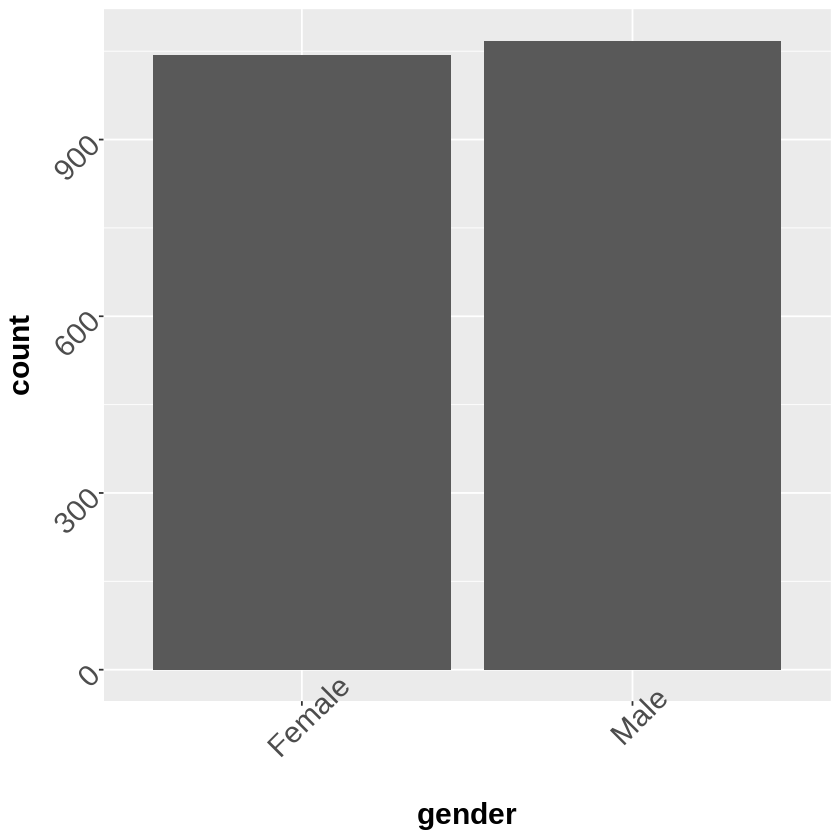

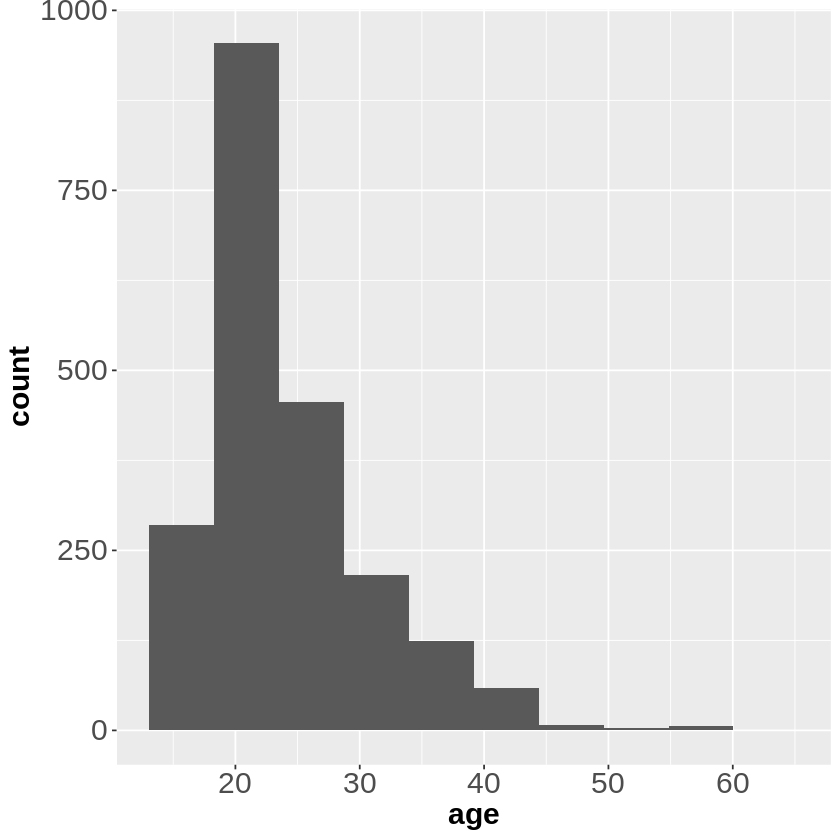

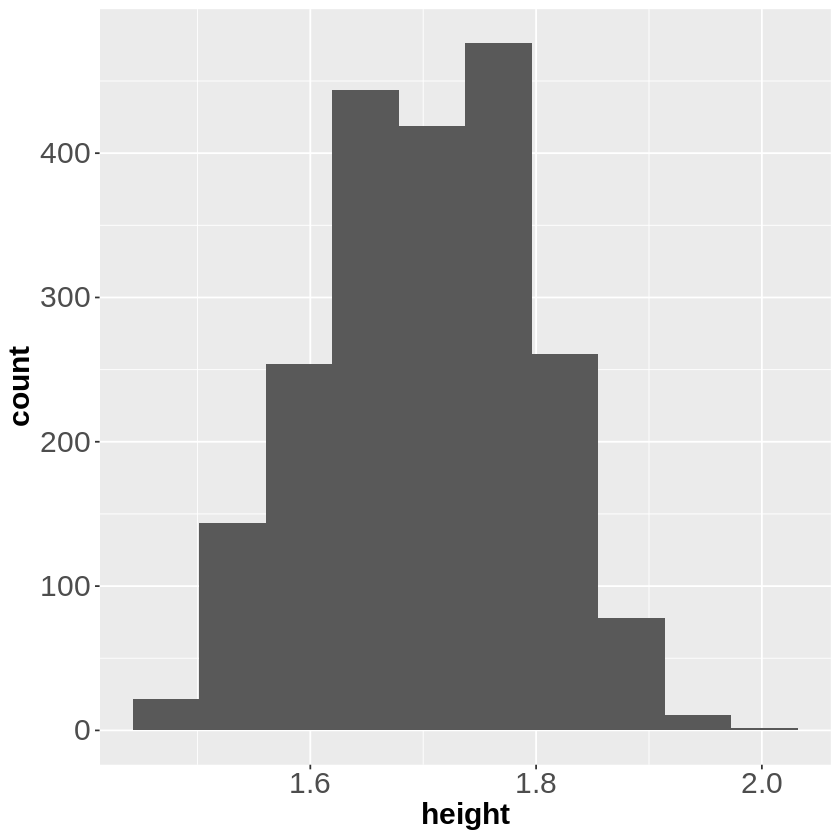

Warning message:
“Ignoring unknown parameters: bins”


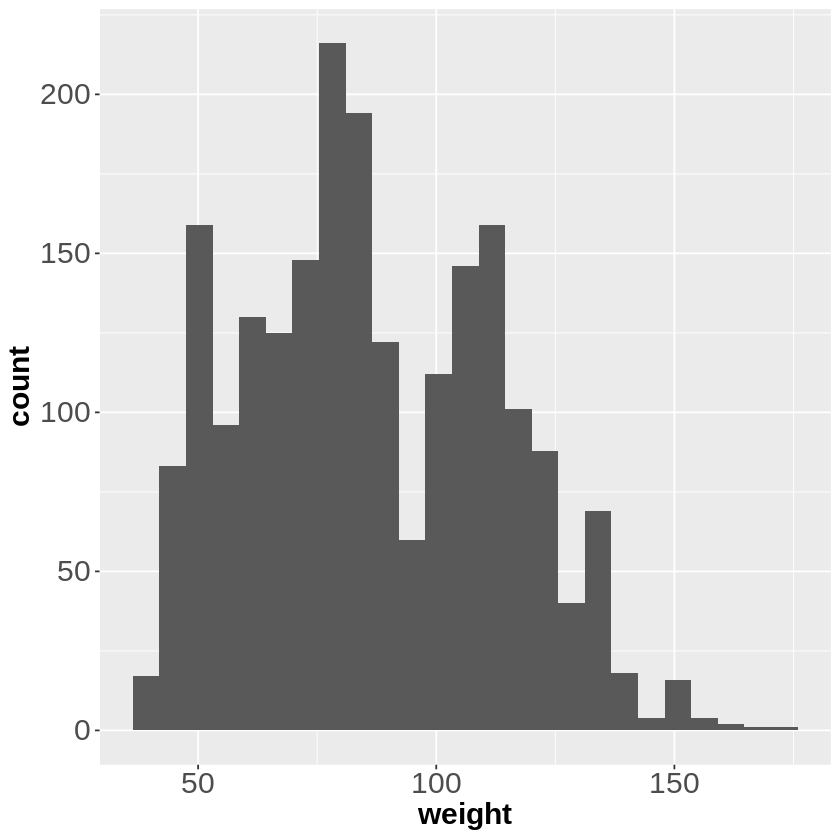

Warning message:
“Ignoring unknown parameters: bins”


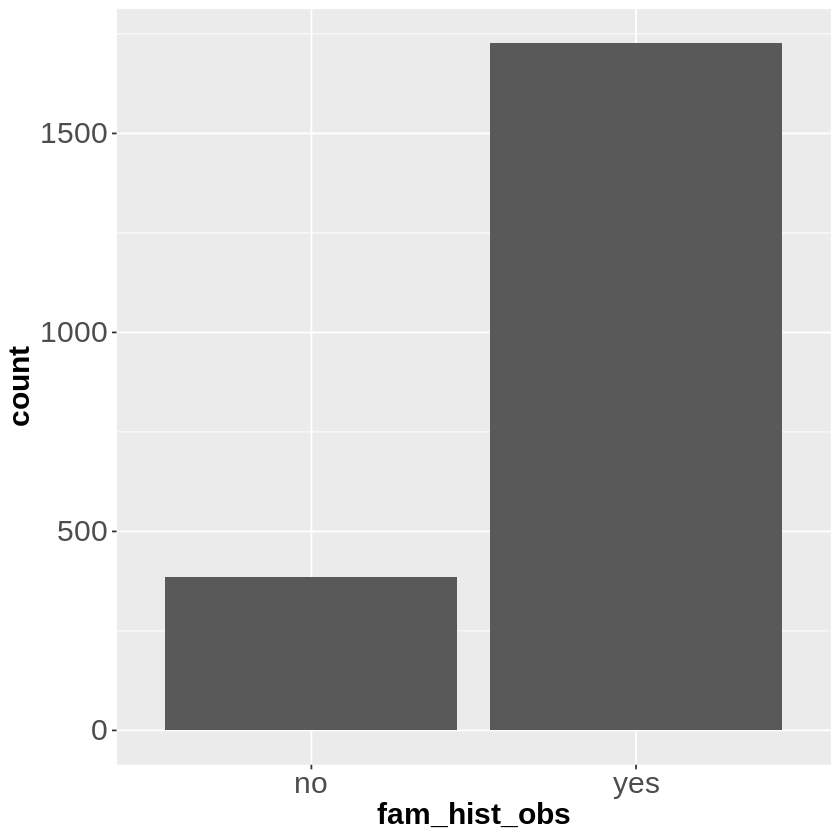

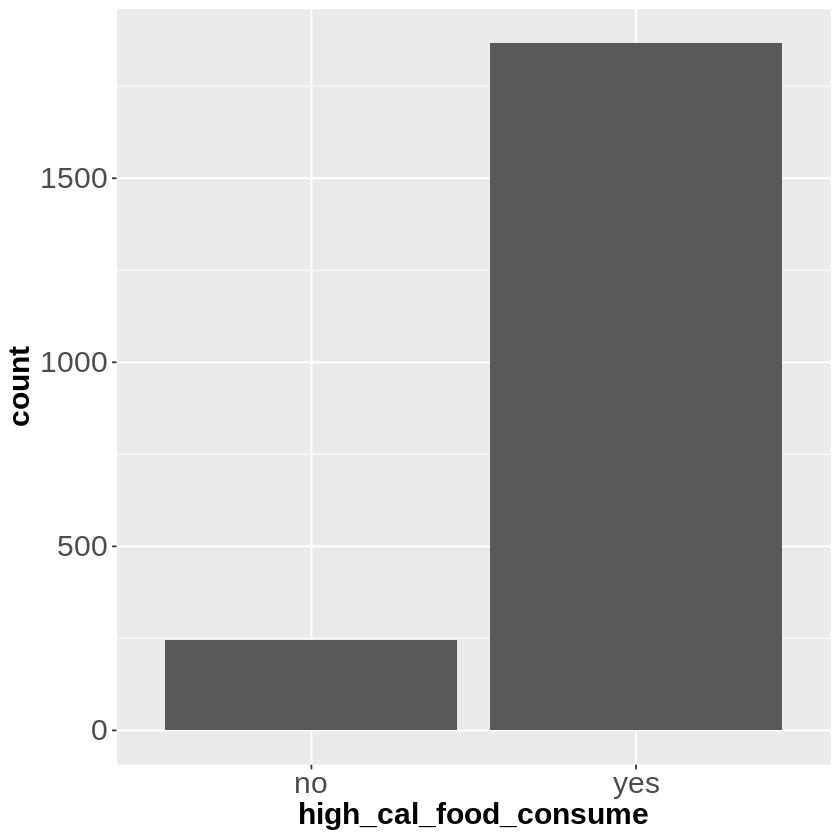

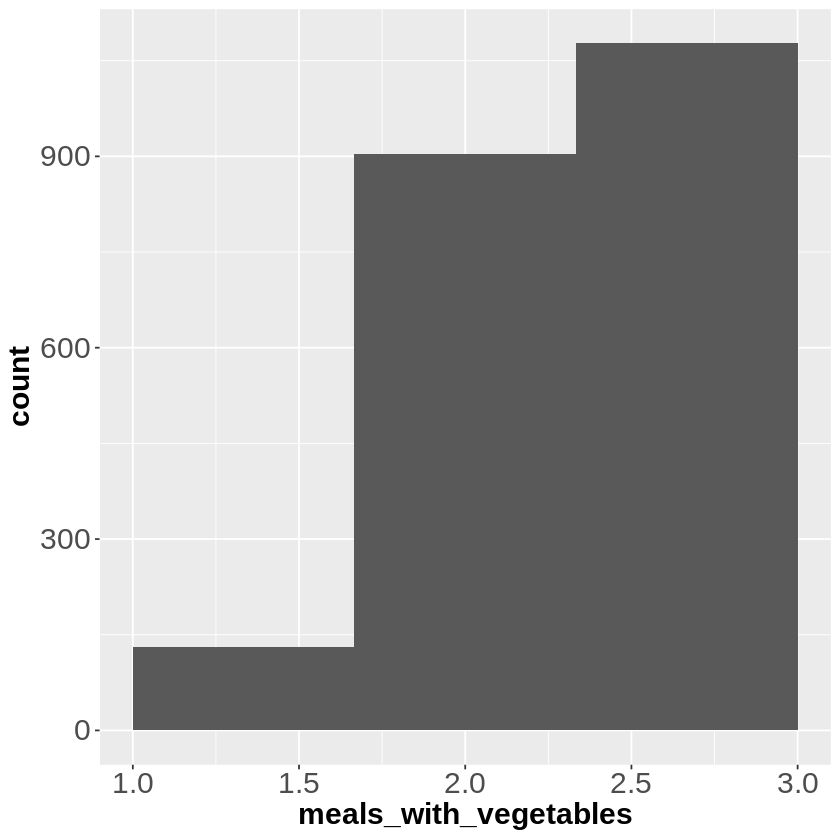

Warning message:
“Ignoring unknown parameters: bins”


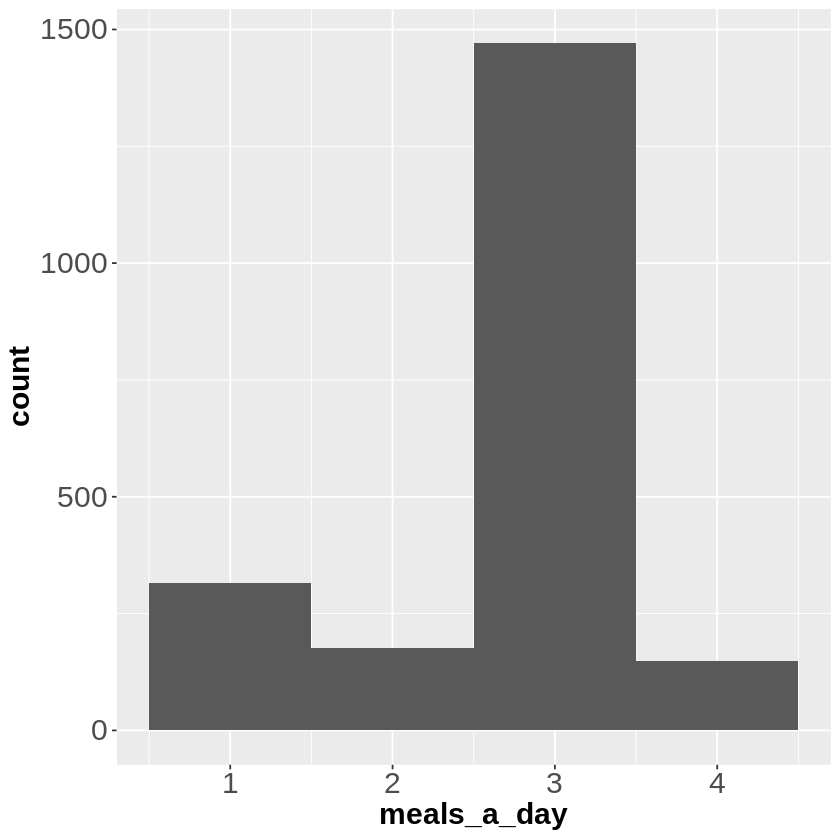

Warning message:
“Ignoring unknown parameters: bins”


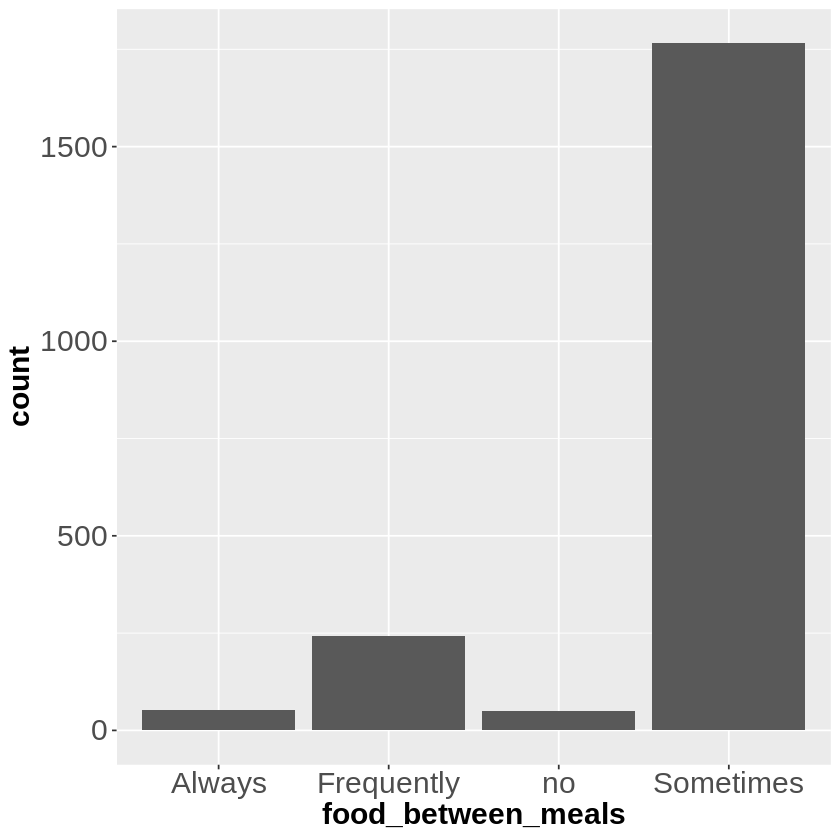

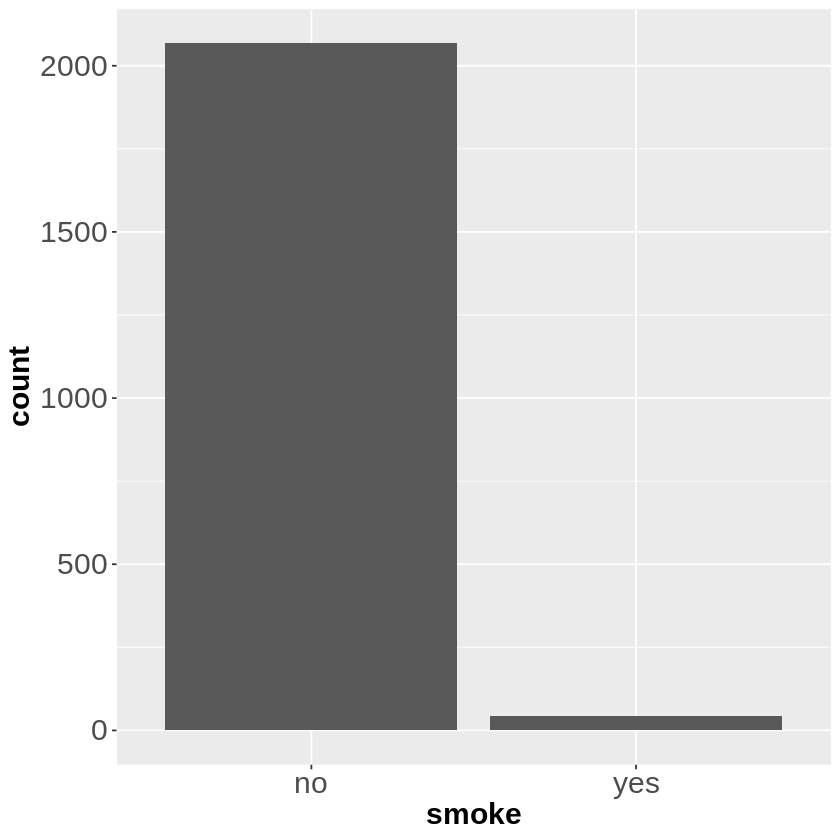

Warning message:
“Ignoring unknown parameters: bins”


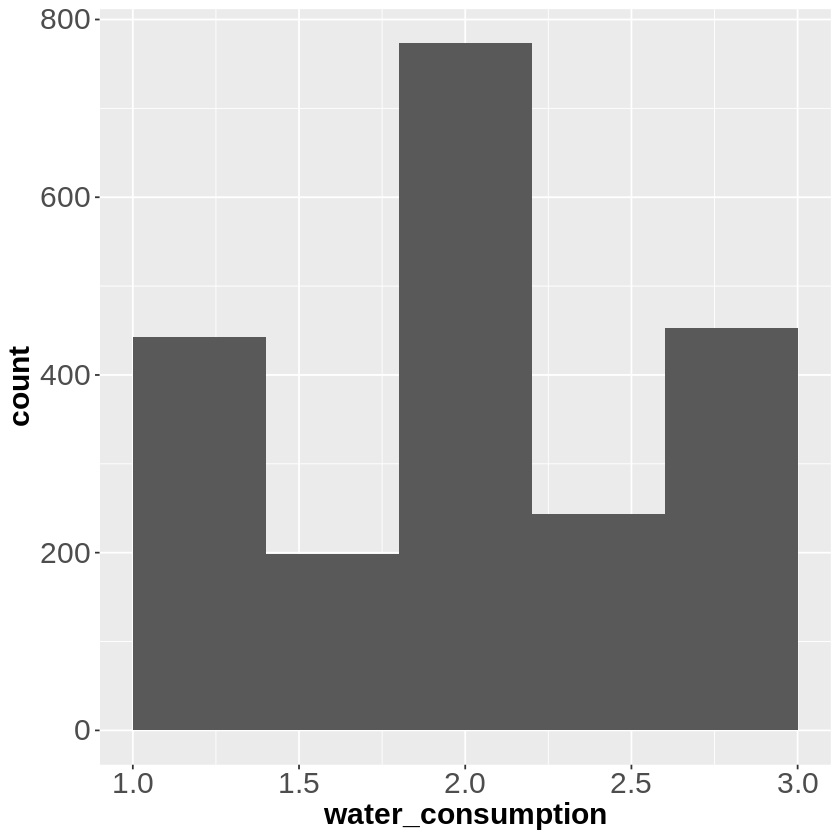

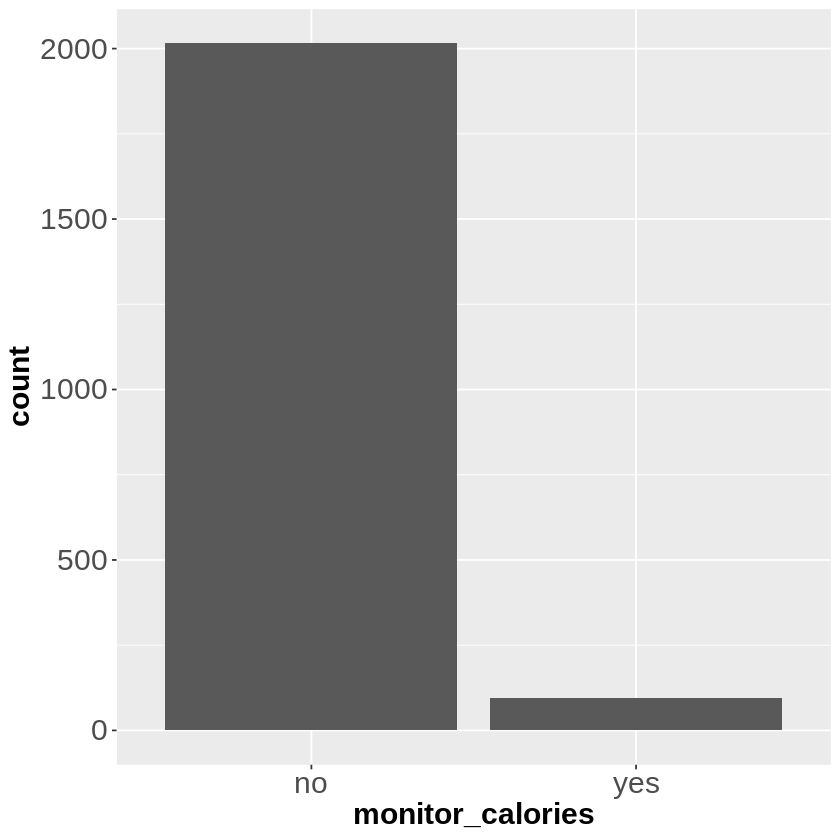

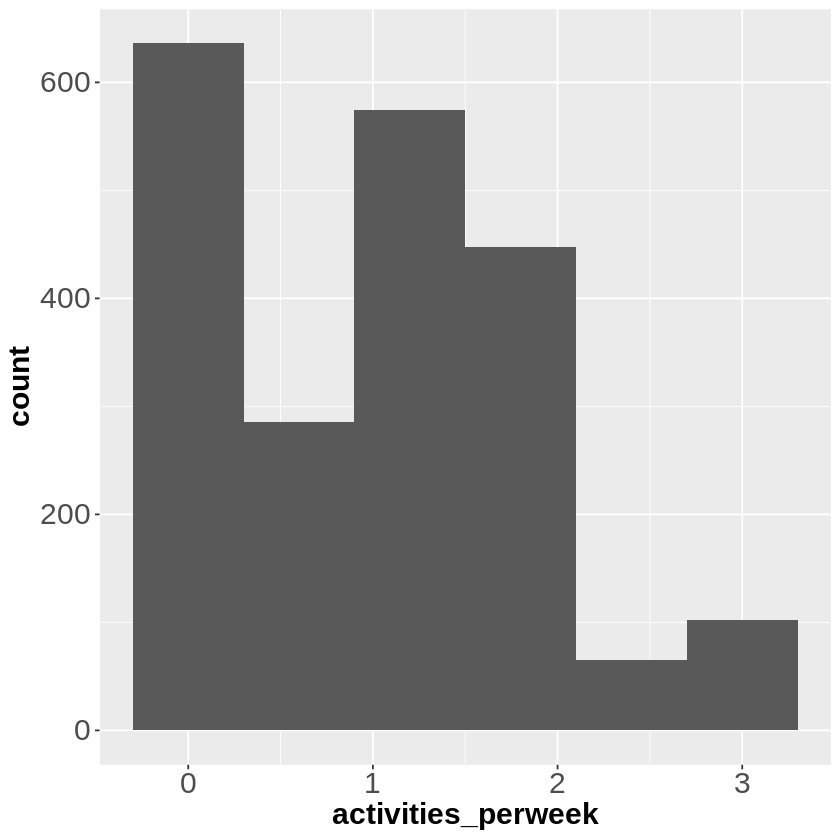

Warning message:
“Ignoring unknown parameters: bins”


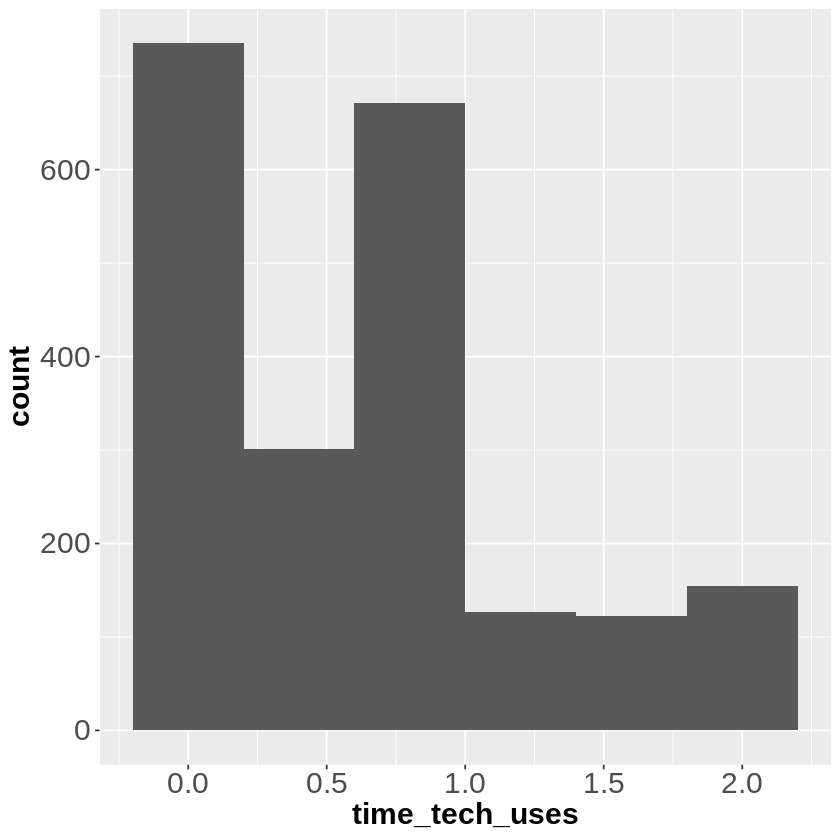

Warning message:
“Ignoring unknown parameters: bins”


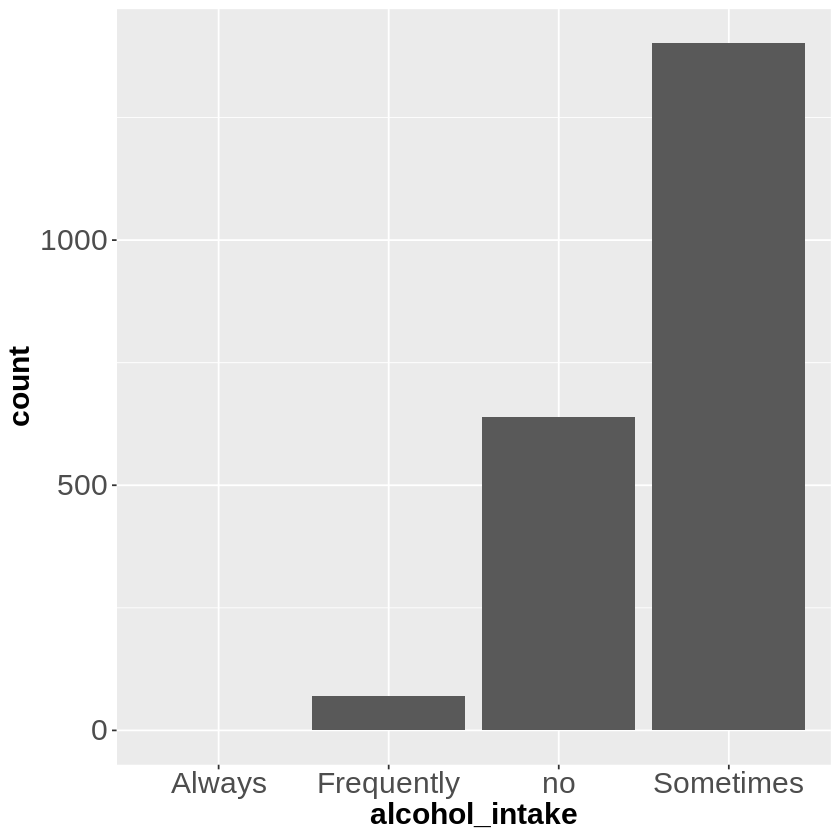

Warning message:
“Ignoring unknown parameters: bins”


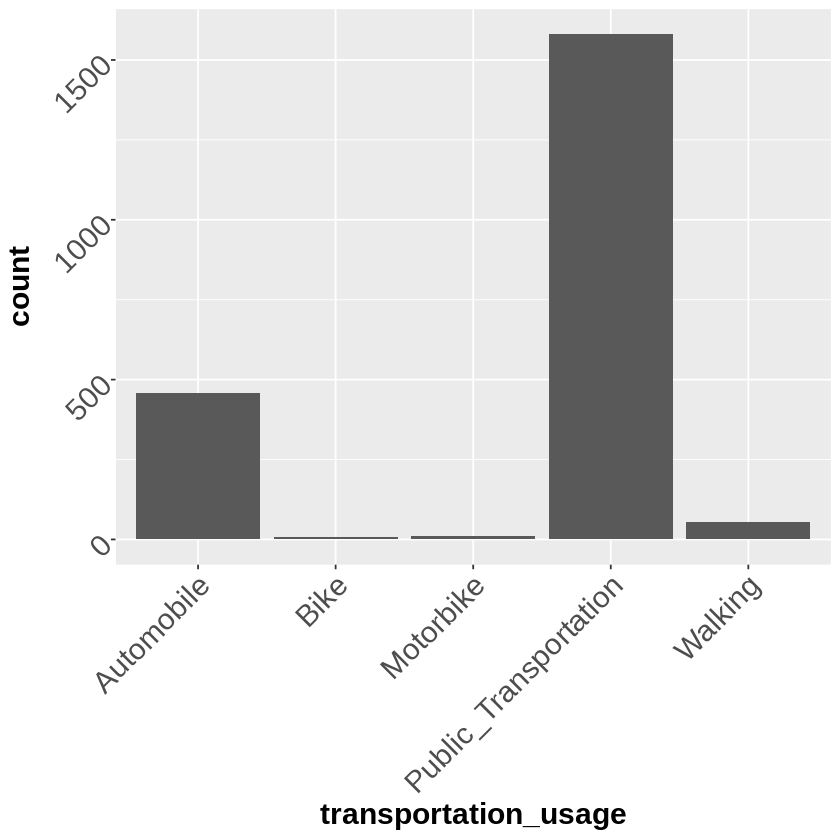

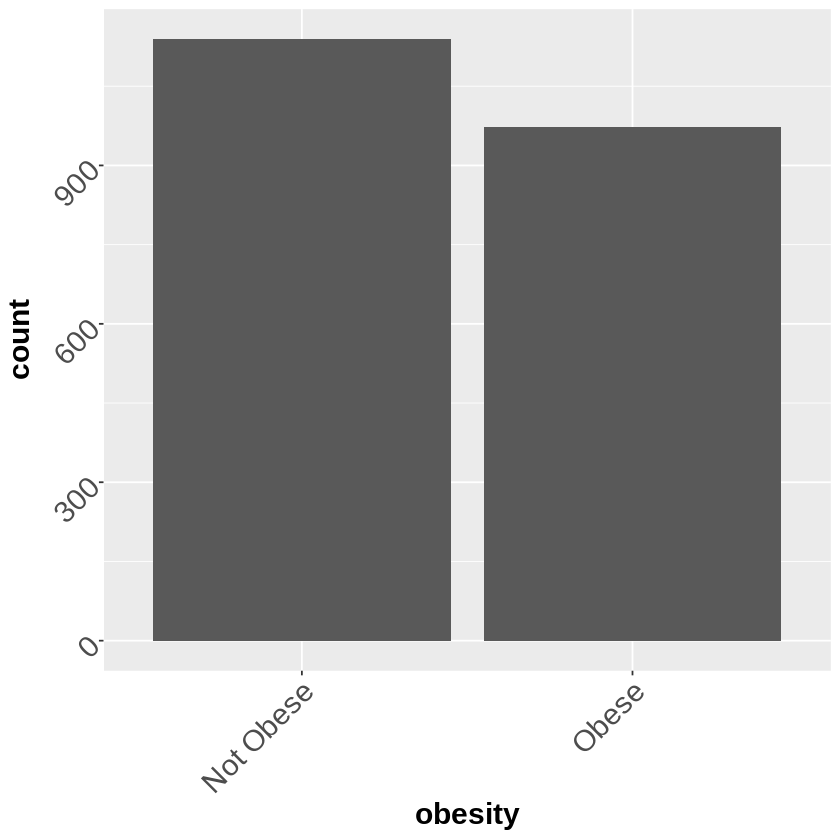

In [32]:
# Univariate Analysis: preparing count plots using qplot for each variable to understand the distribution of data for 
# continuous, discrete (numeric variables with countable number of values between any two values) and categorical variables
qplot(df$gender,bins = 2,xlab='gender',ylab="count")+theme(axis.text=element_text(angle=45,size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$age,bins = 10,xlab='age',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$height,bins = 10,xlab='height',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$weight,bins = 25,xlab='weight',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$fam_hist_obs,bins = 2,xlab='fam_hist_obs',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$high_cal_food_consume,bins = 2,xlab='high_cal_food_consume',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$meals_with_vegetables,bins = 4,xlab='meals_with_vegetables',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$meals_a_day,bins = 4,xlab='meals_a_day',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$food_between_meals,bins = 4,xlab='food_between_meals',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$smoke,bins = 2,xlab='smoke',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$water_consumption,bins = 6,xlab='water_consumption',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$monitor_calories,bins = 2,xlab='monitor_calories',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$activities_perweek,bins = 6,xlab='activities_perweek',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$time_tech_uses,bins = 6,xlab='time_tech_uses',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$alcohol_intake,bins = 4,xlab='alcohol_intake',ylab="count")+theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$transportation_usage,bins = 5,xlab='transportation_usage',ylab="count")+theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))
qplot(df$obesity,bins = 2,xlab='obesity',ylab="count")+theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))




Weight shows a bimodal distribution.Number of non-obese to obese people is not much different. On the contrary, 
the number of people who have family history of obesity, who consume high calorie foods, and who monitor calories 
is vastly different from those who do not. Activities per week is a discrete numerical variable.

Density plots for continuous numeric variables 'age','height','weight'...

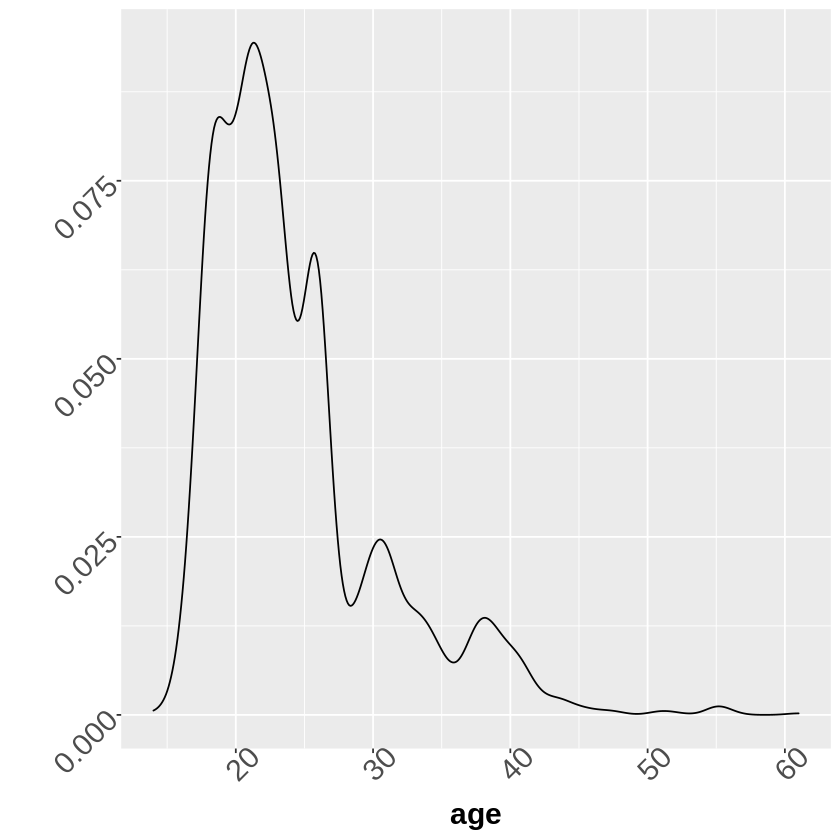

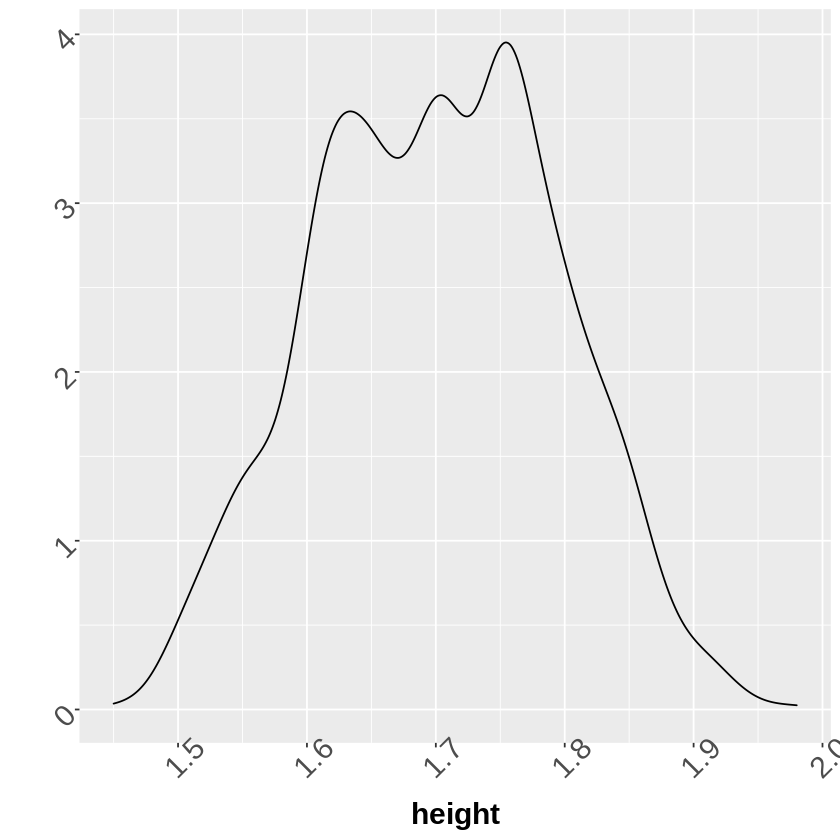

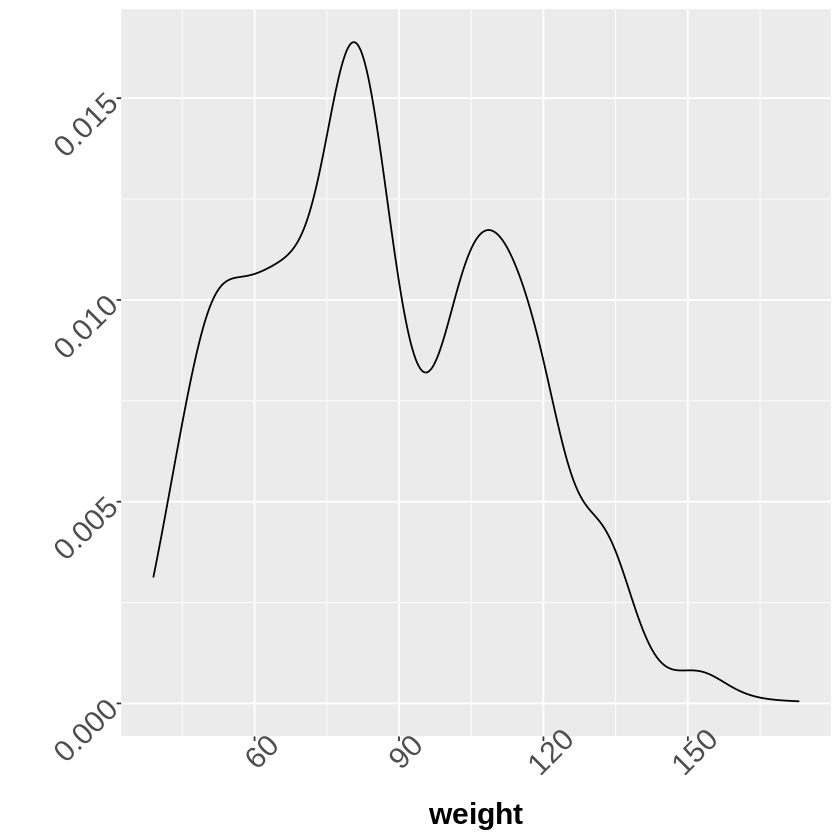

In [33]:
# Density plots for continuous numeric variables 'age','height','weight'...
qplot(age, data = df, geom = c("density"))+theme(axis.text=element_text(angle=45,size=18),axis.title=element_text(size=18,face="bold"))
qplot(height, data = df, geom = c("density"))+theme(axis.text=element_text(angle=45,size=18),axis.title=element_text(size=18,face="bold"))
qplot(weight, data = df, geom = c("density"))+theme(axis.text=element_text(angle=45,size=18),axis.title=element_text(size=18,face="bold"))
#

Age has left sweked data, Height seems to have a normal distribution, Weight has a biomodal distribution.

Jitter plot investigating relation of obesity with the other independent variables...

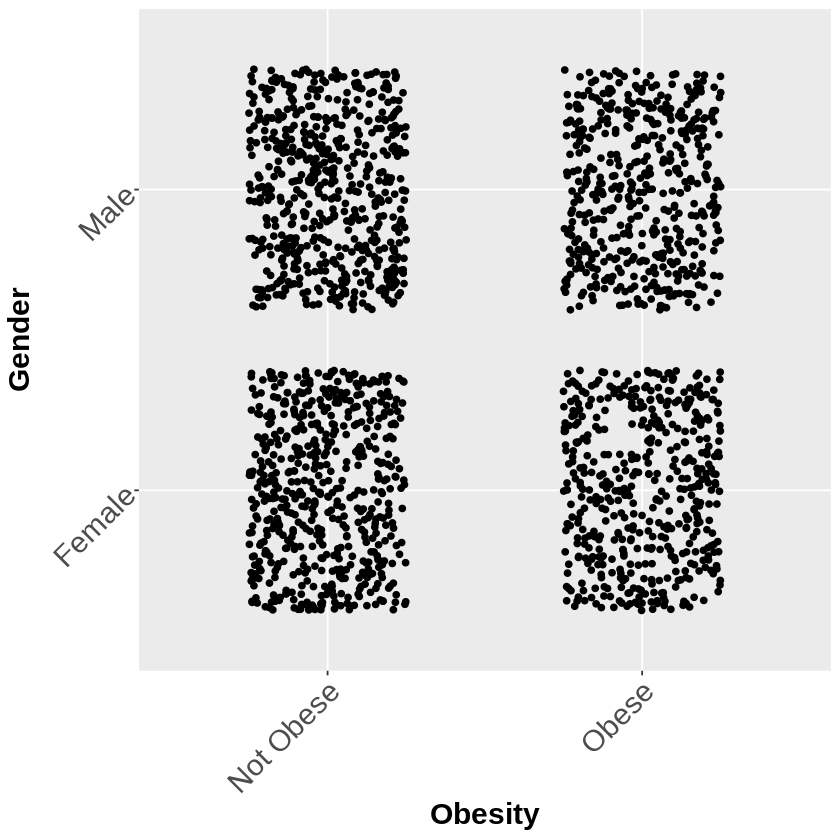

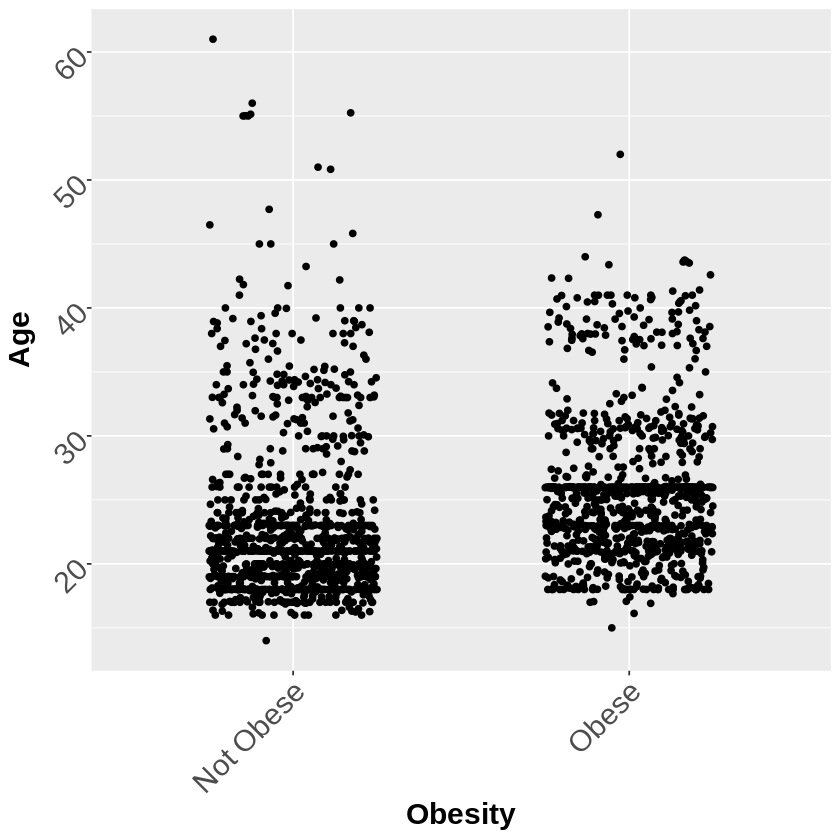

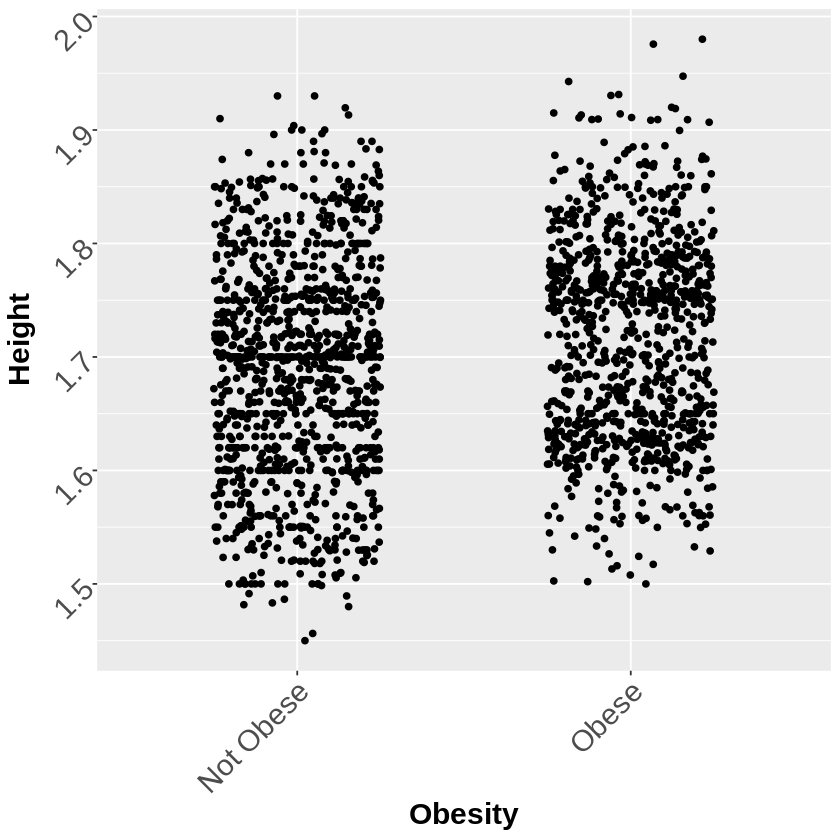

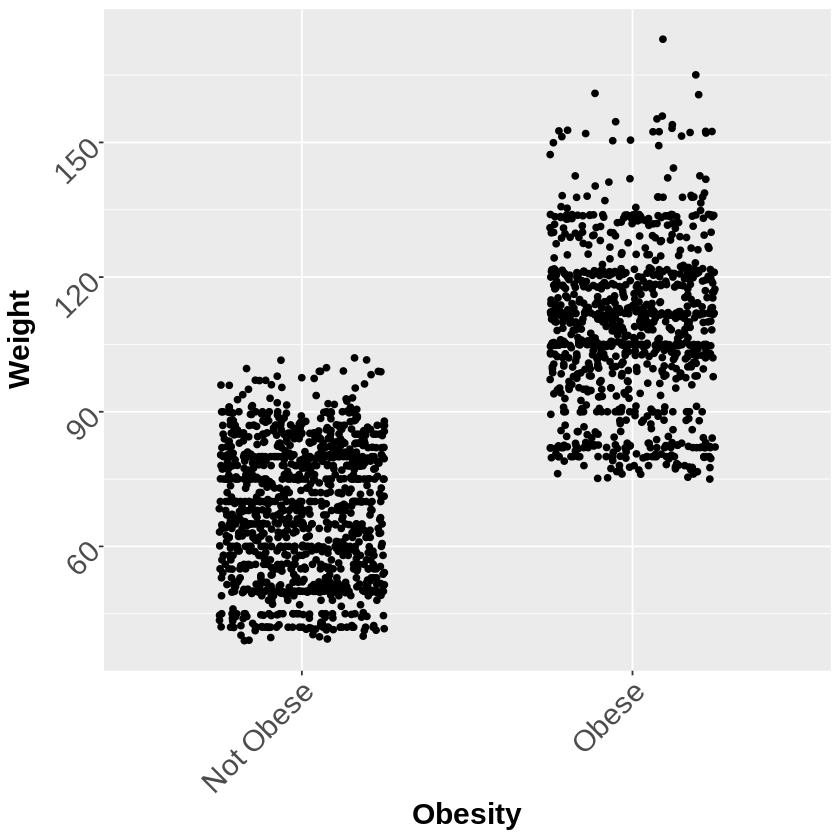

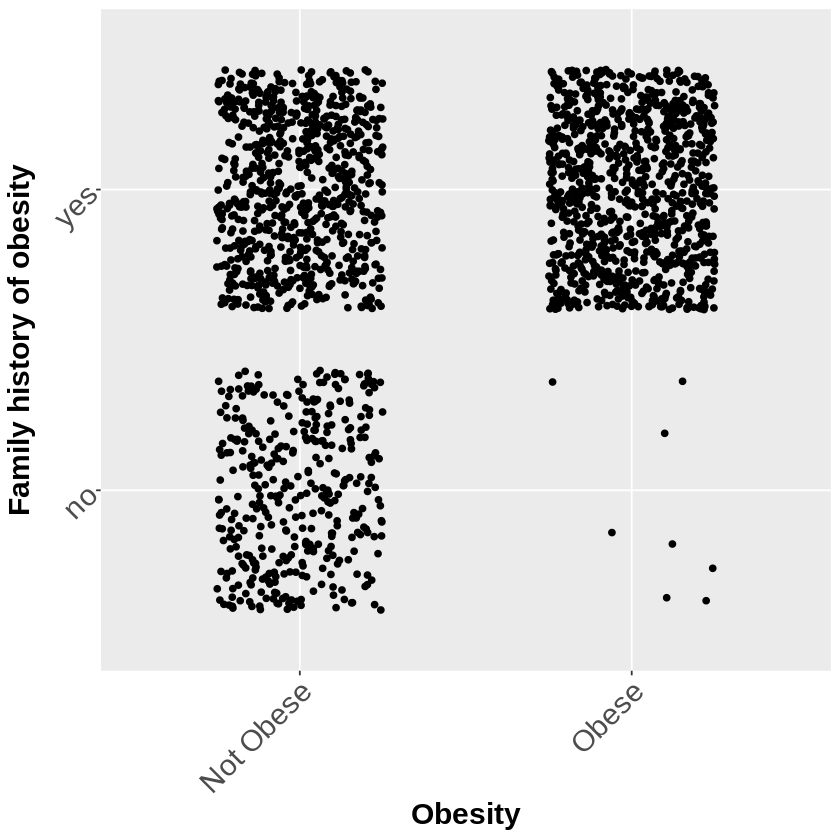

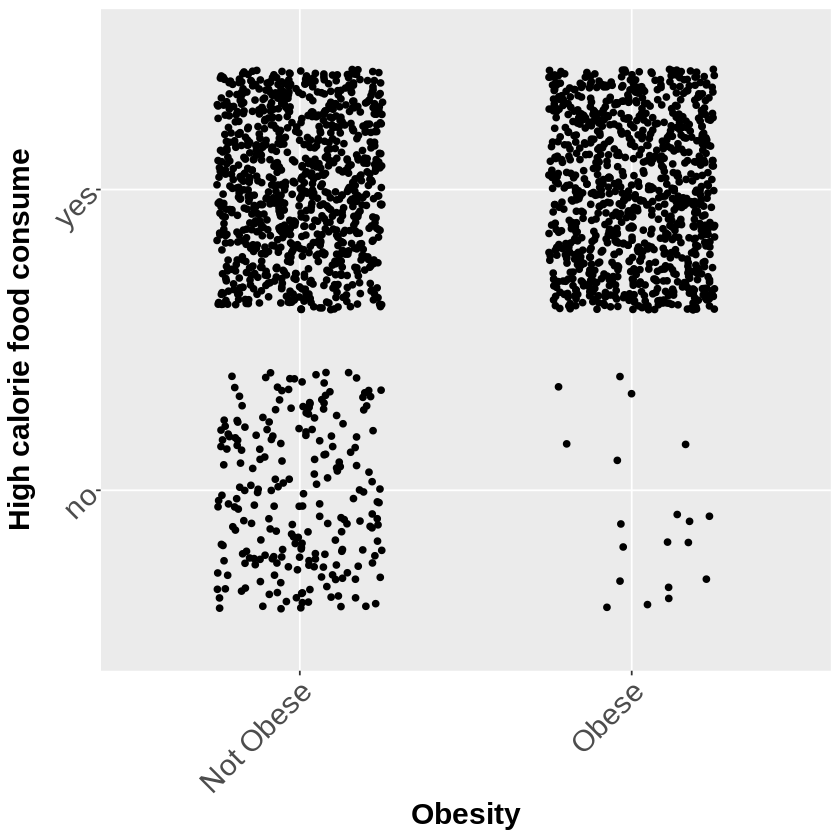

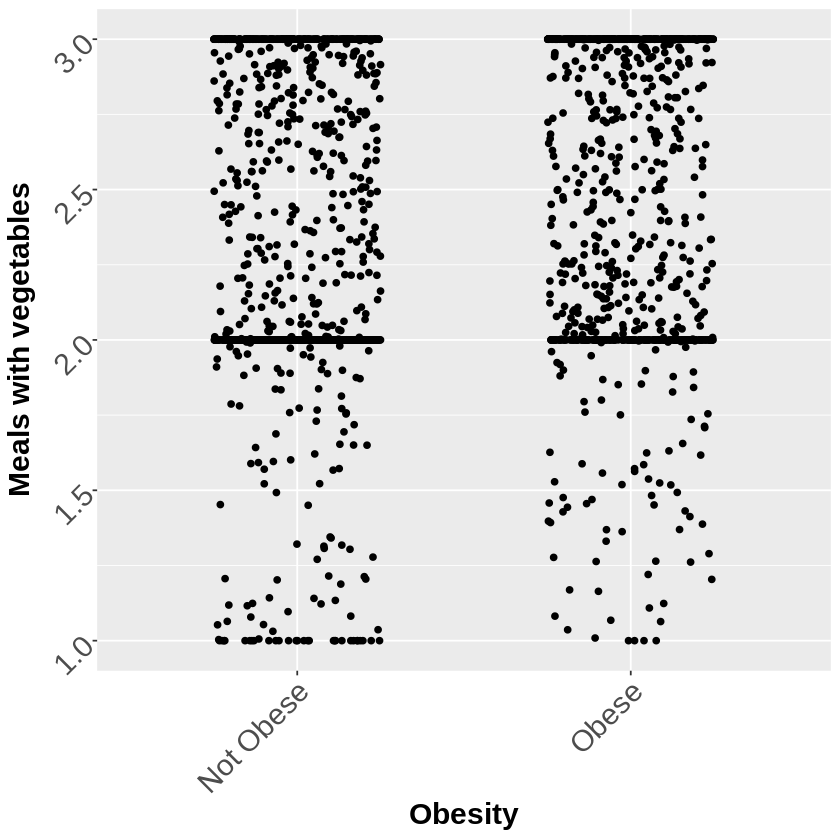

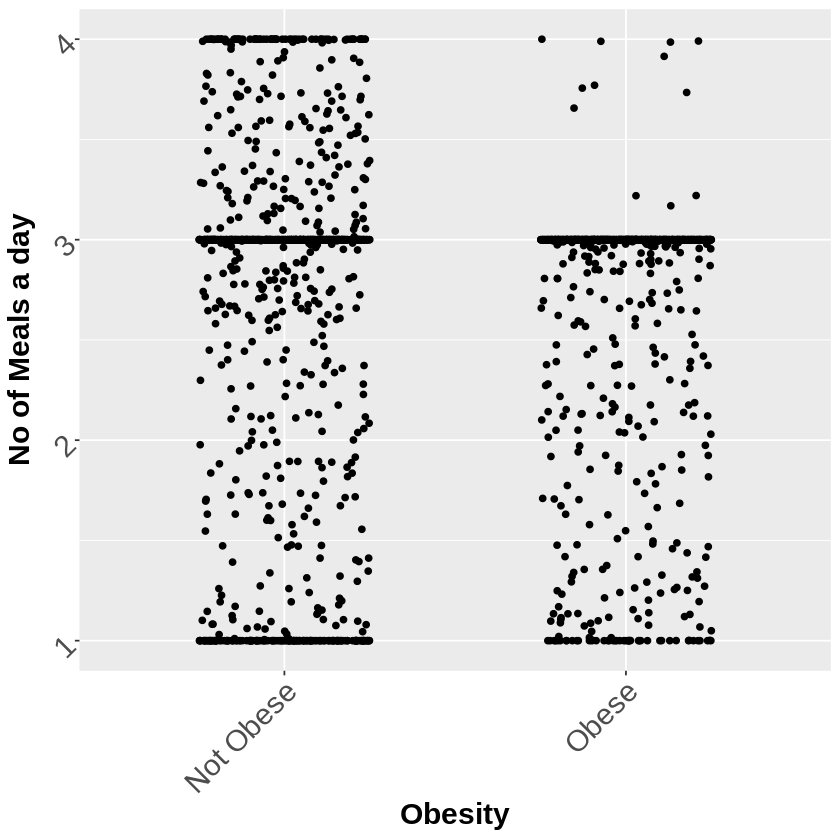

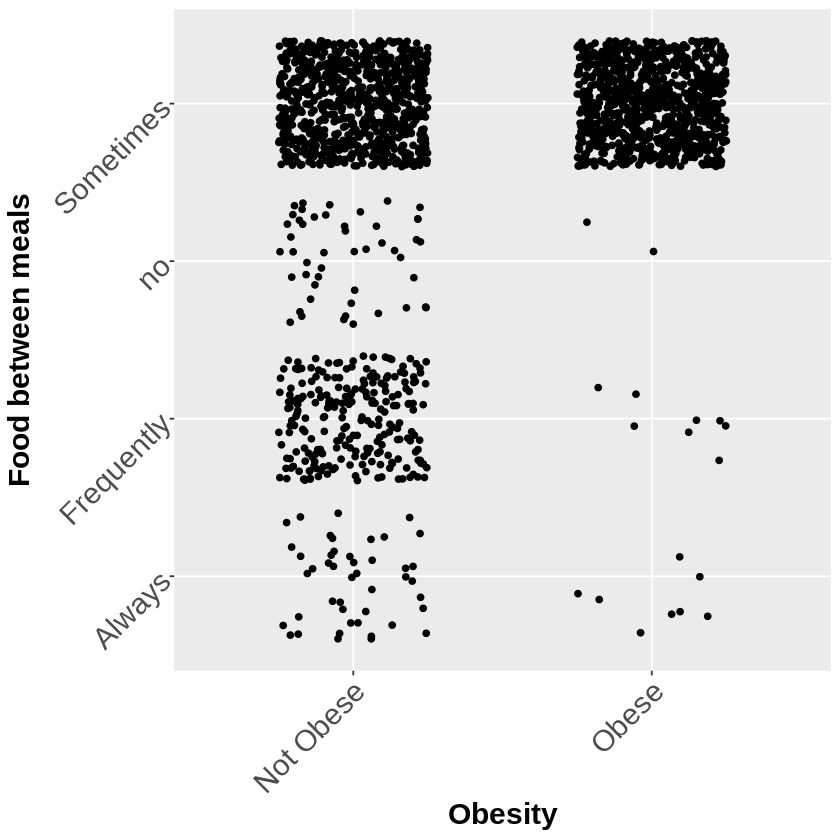

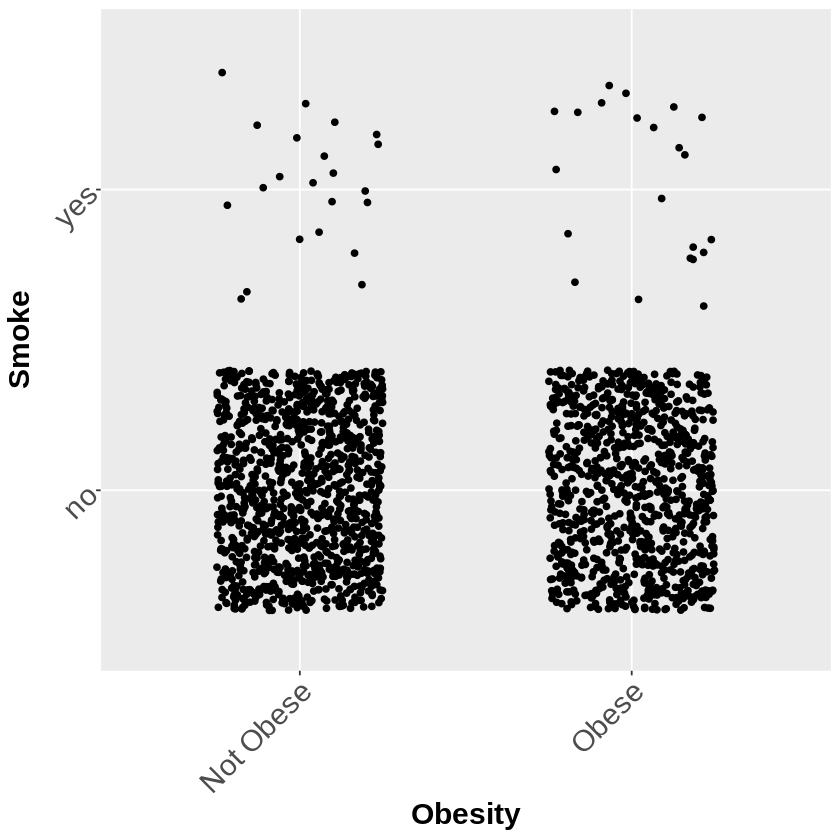

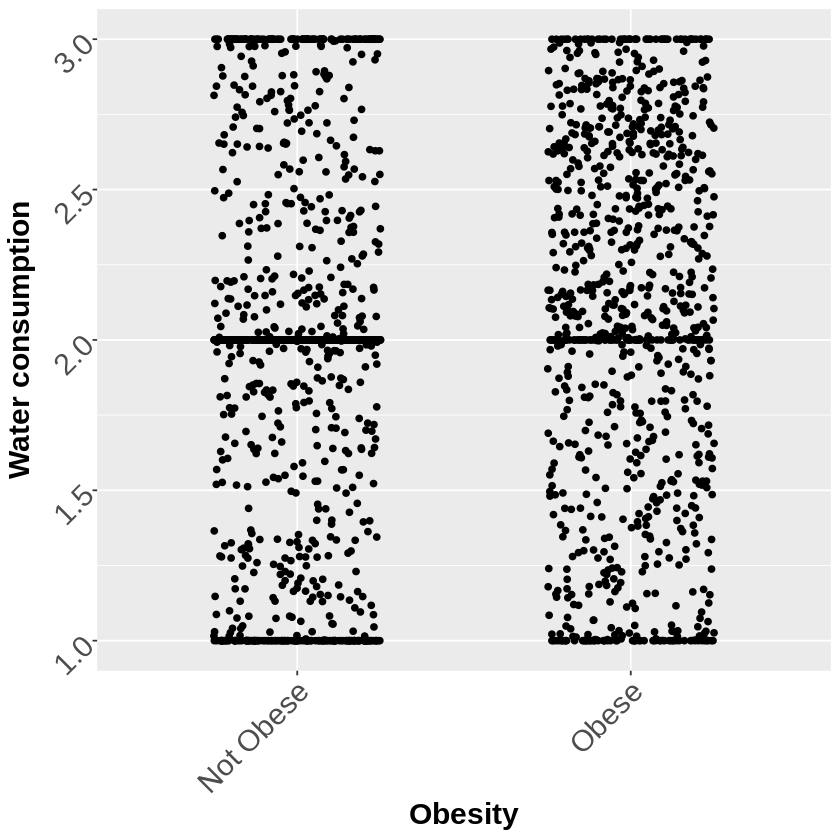

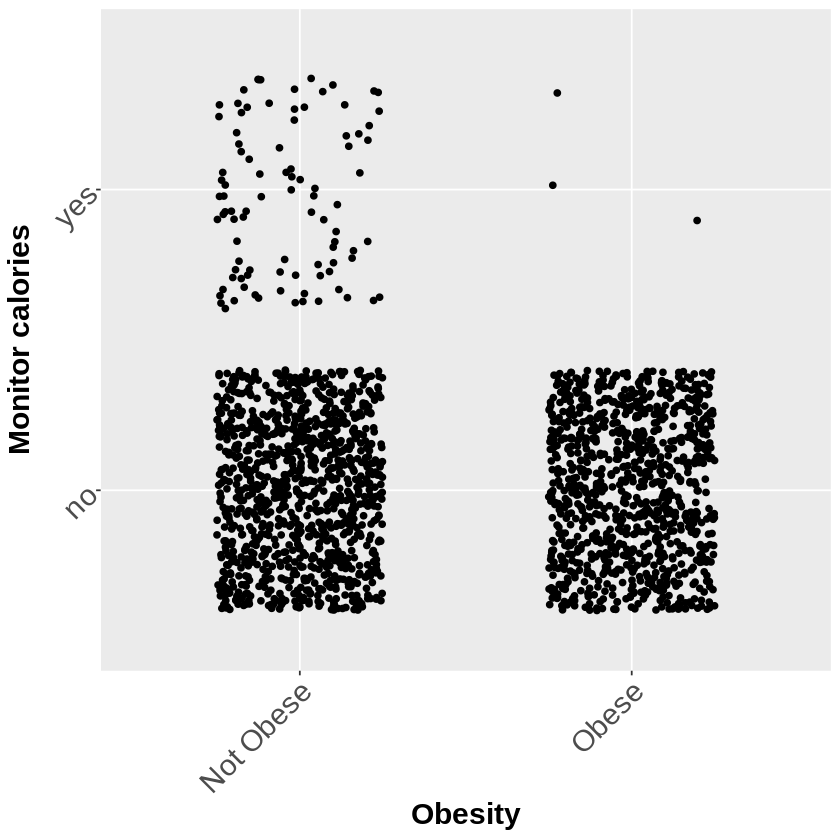

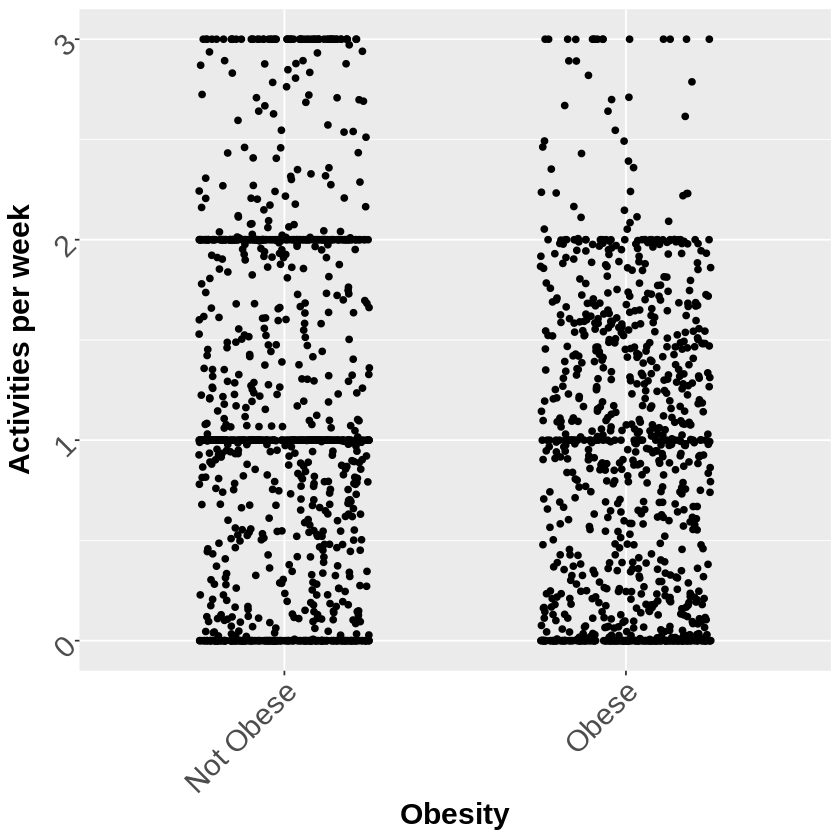

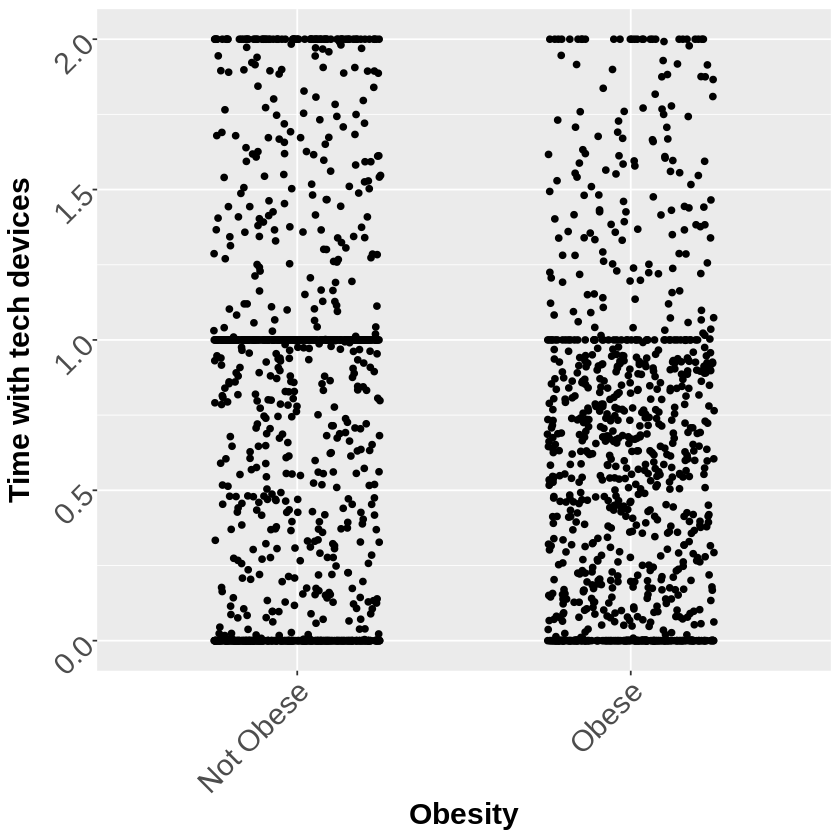

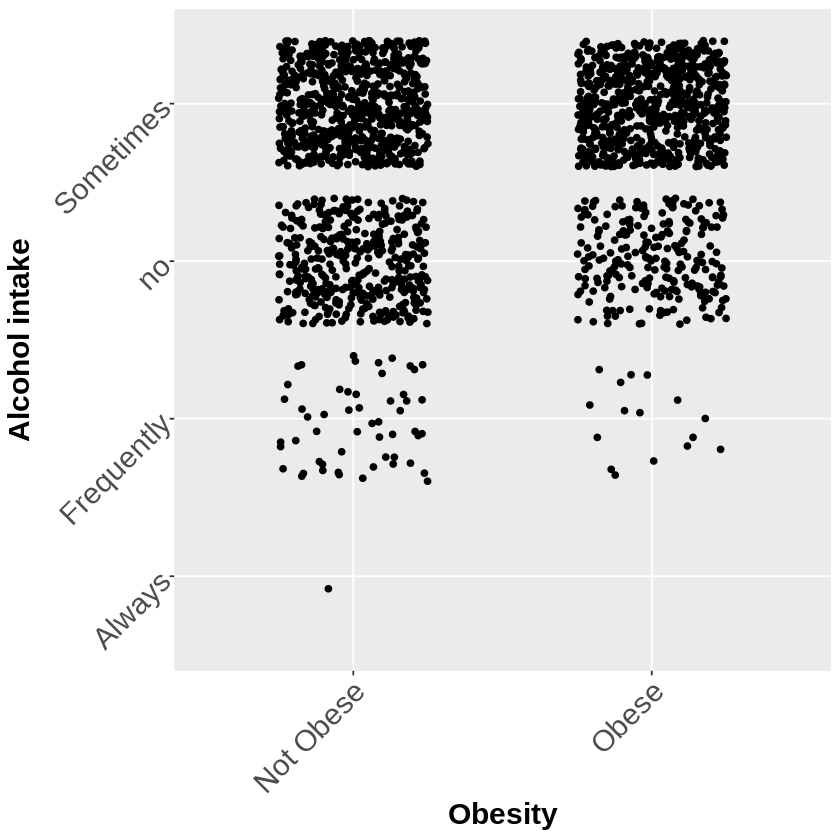

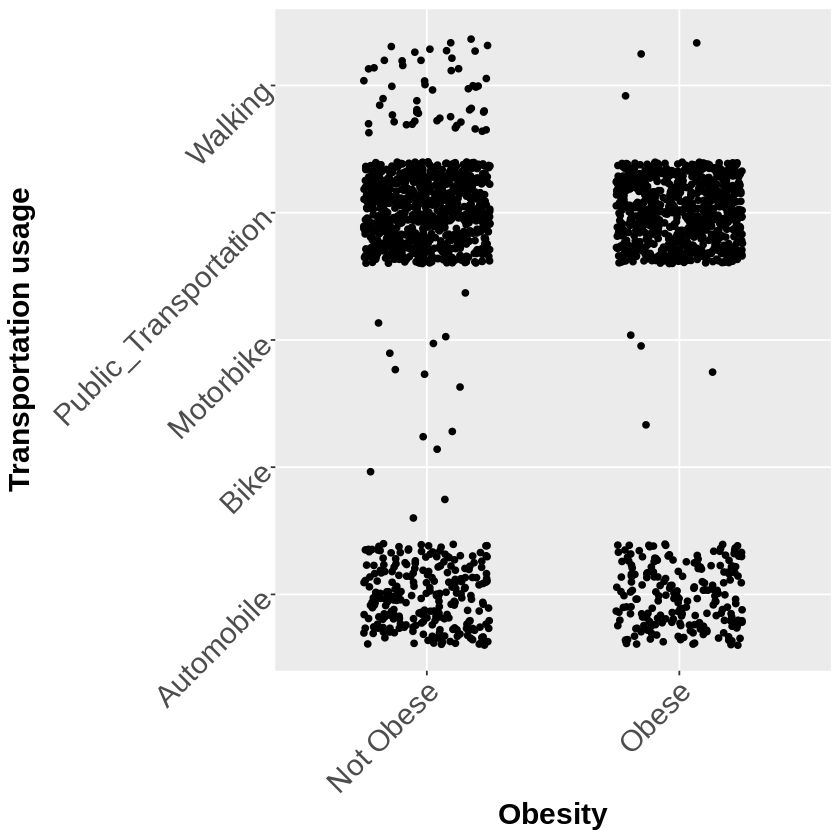

In [34]:
# Jitter plot investigating relation of obesity with the other 16 variables...

ggplot(df) + aes(x = obesity, y = gender) + geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Gender")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=age)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Age")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))
    
ggplot(df) + aes(x=obesity,y=height)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Height")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=weight)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Weight")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=fam_hist_obs)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Family history of obesity")+ 
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=high_cal_food_consume)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("High calorie food consume")+ 
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=meals_with_vegetables)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Meals with vegetables")+ 
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=meals_a_day)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("No of Meals a day")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=food_between_meals)+ geom_jitter(width = 0.25) + xlab("Obesity") +  ylab("Food between meals")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=smoke)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Smoke")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))

ggplot(df) + aes(x=obesity,y=water_consumption)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Water consumption")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))  
   
ggplot(df) + aes(x=obesity,y=monitor_calories)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Monitor calories")+ 
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))  
   
ggplot(df) + aes(x=obesity,y=activities_perweek)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Activities per week")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))  
  
ggplot(df) + aes(x=obesity,y=time_tech_uses)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Time with tech devices")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))  
      
ggplot(df) + aes(x=obesity,y=alcohol_intake)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Alcohol intake")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))  
  
ggplot(df) + aes(x=obesity,y=transportation_usage)+ geom_jitter(width = 0.25) + xlab("Obesity") + ylab("Transportation usage")+
    theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold"))


Jitter plot suggests that 'Weight' shows clear differences as per obesity levels ('Not Obese' vs 'Obese'). Among other variables which show visual differences in data distribution as per obesity levels are:
'Family history of obesity','High calorie food consume','No of Meals a day','Food between meals','Monitor calories', 'Activities per week','"Time with tech devices' and 'Transportation usage'.

Multivariate Analysis:

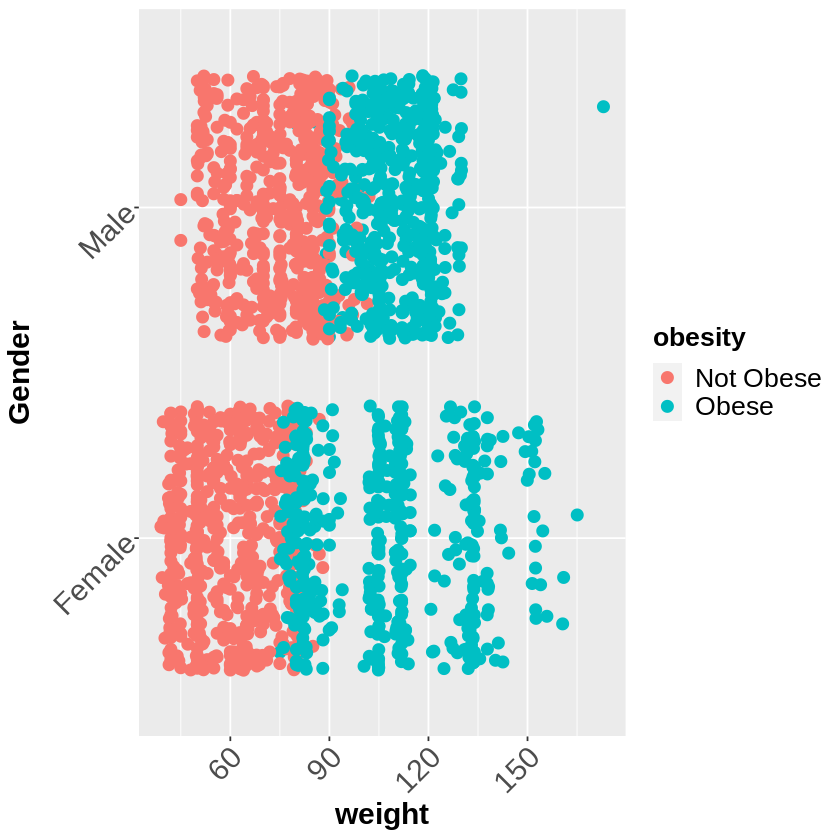

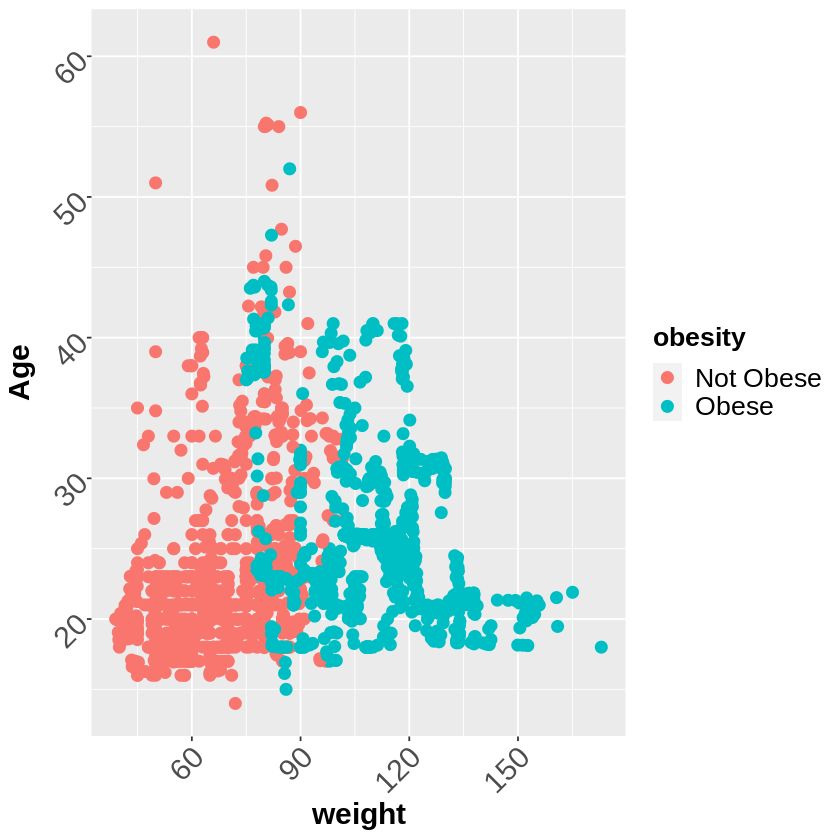

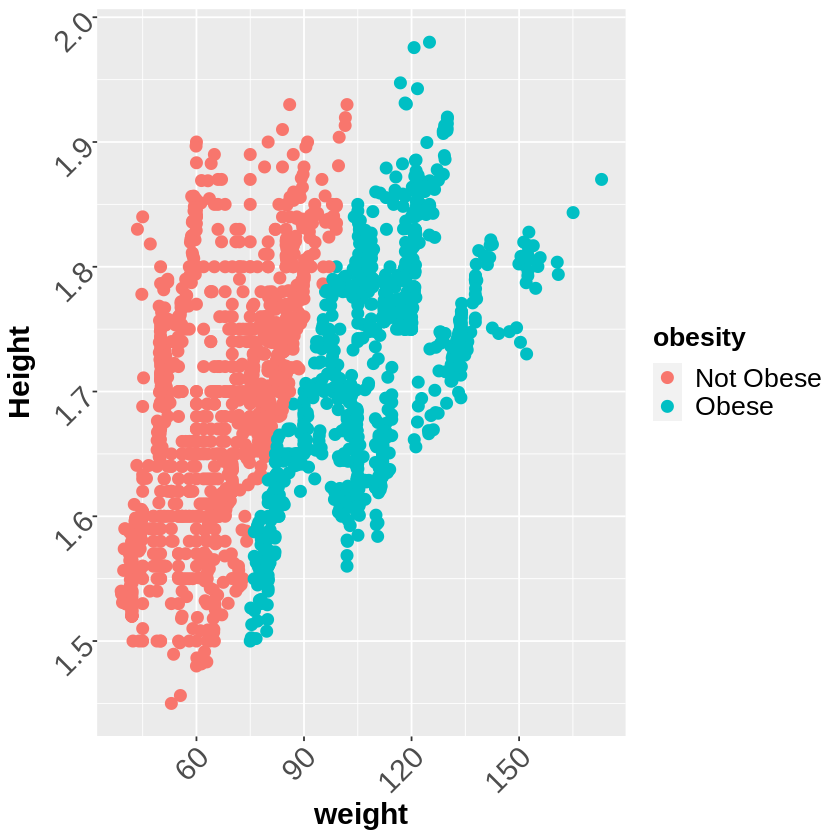

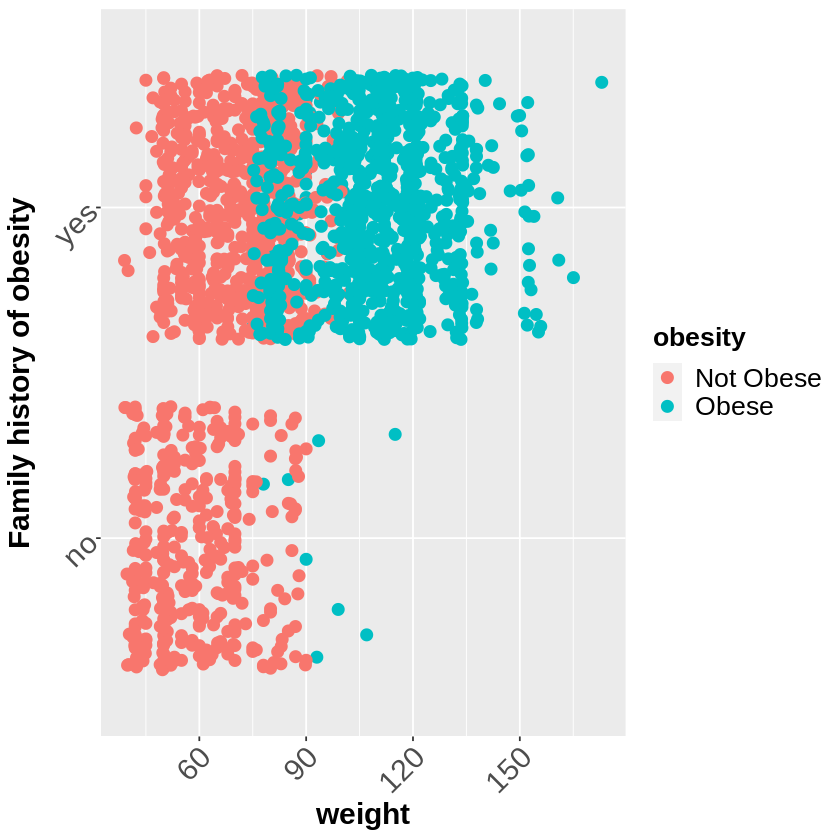

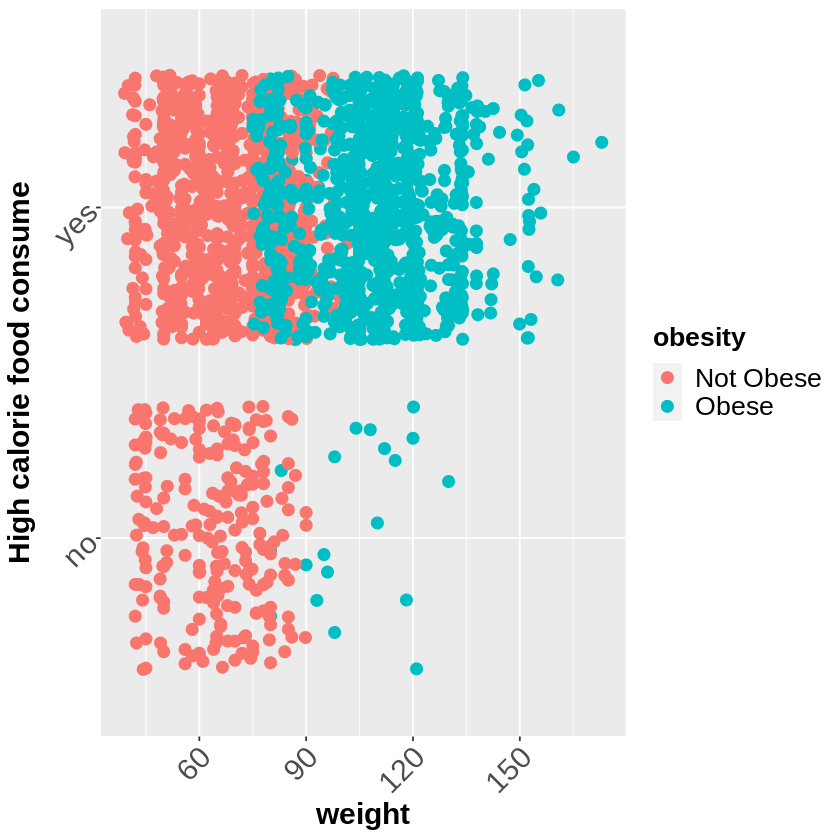

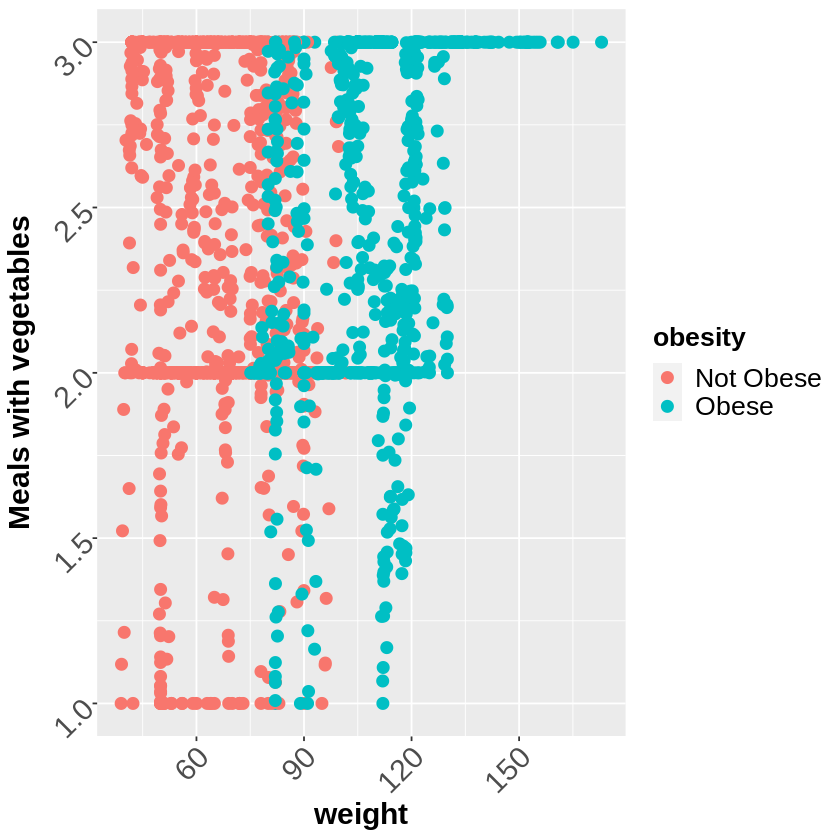

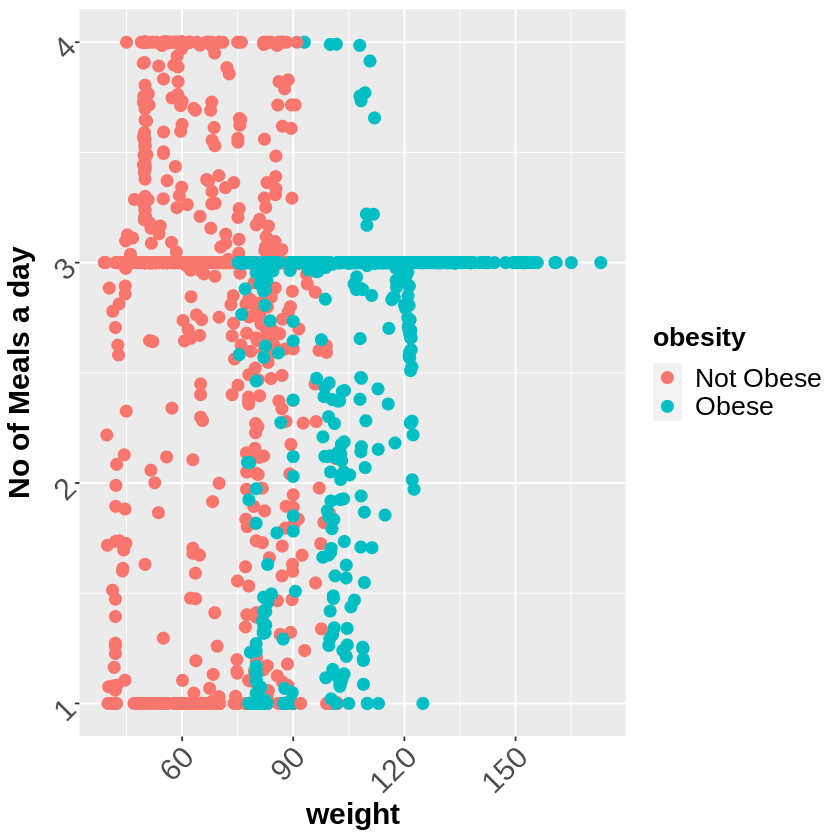

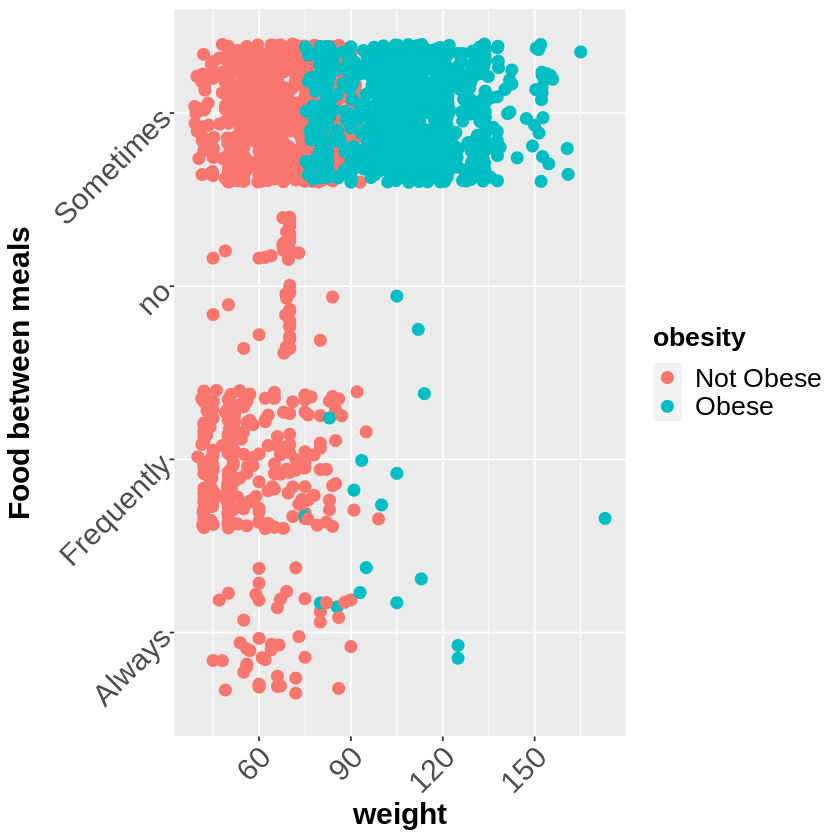

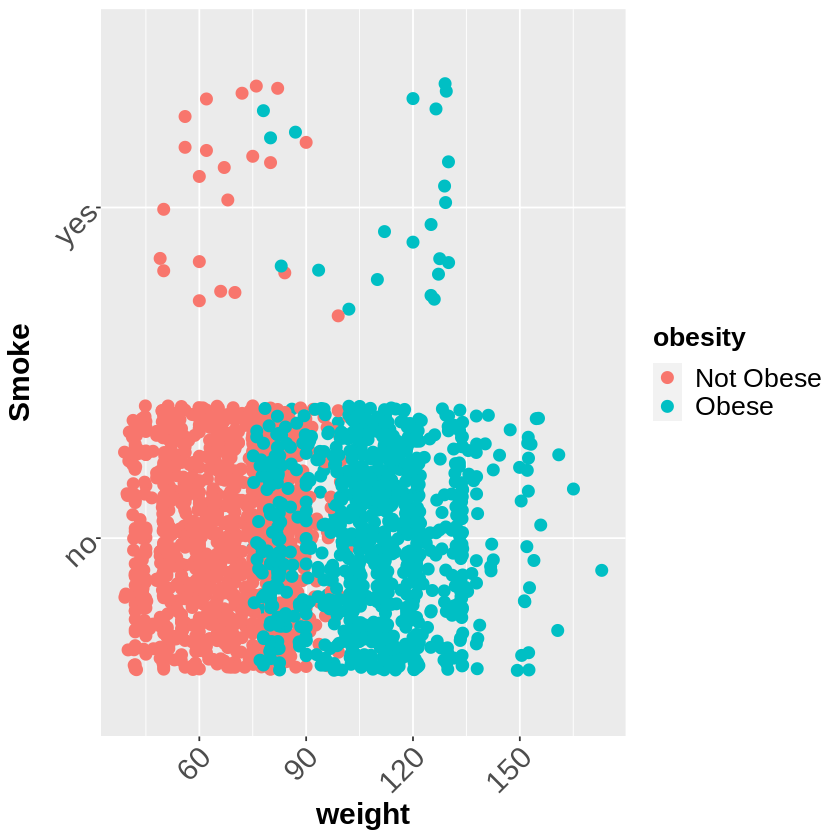

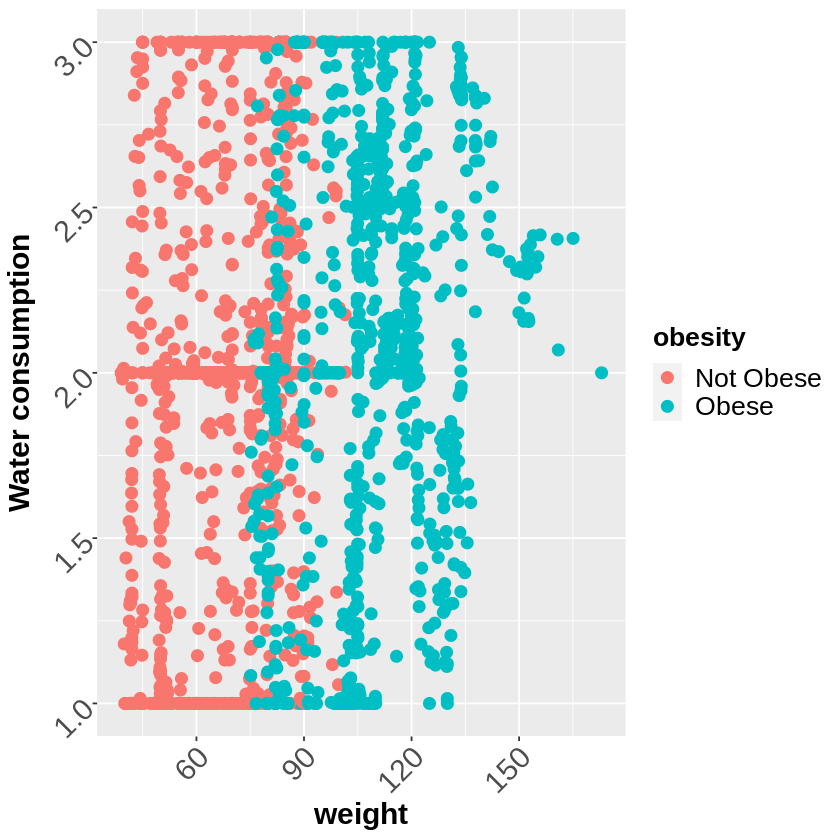

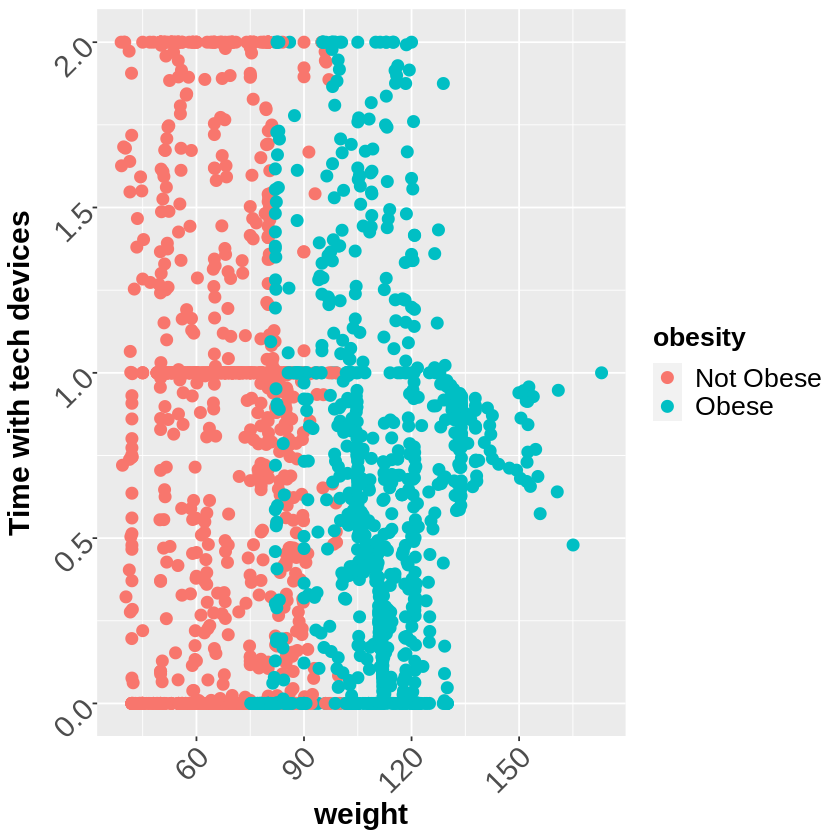

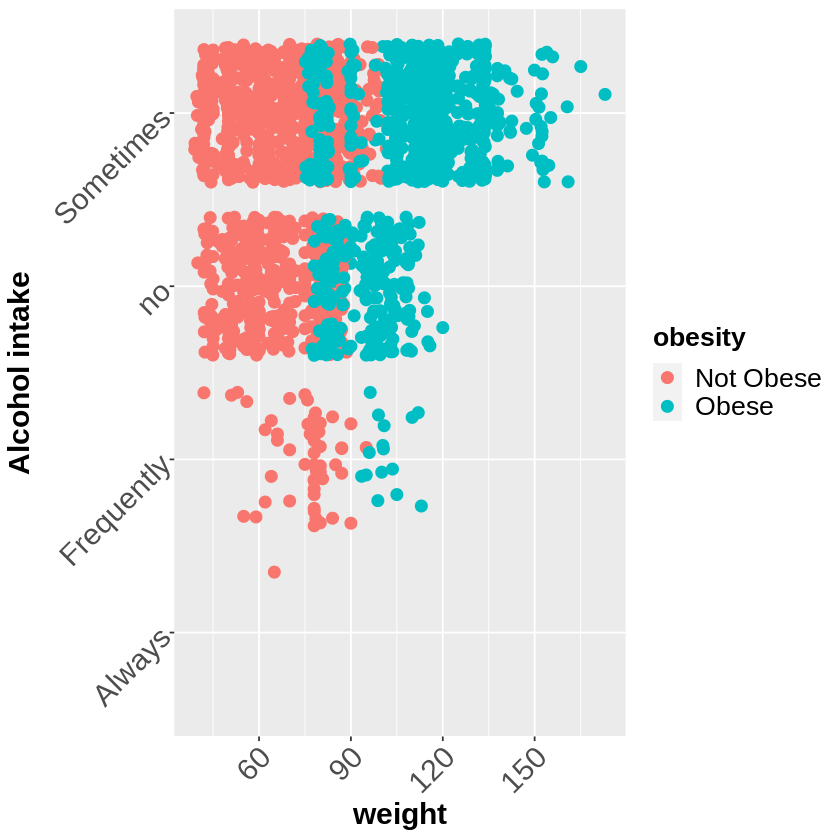

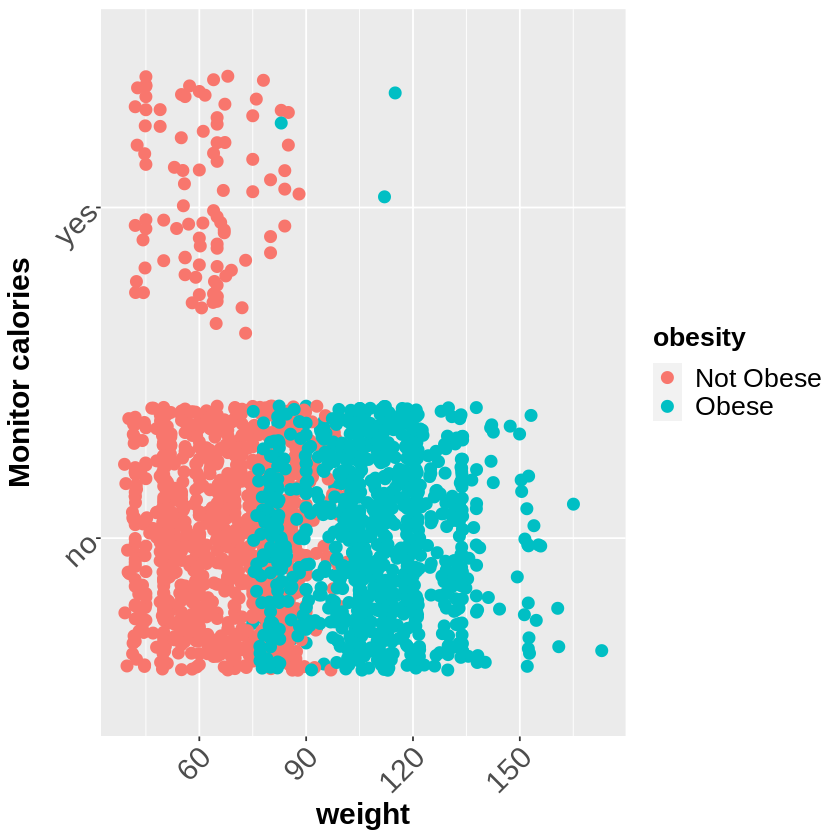

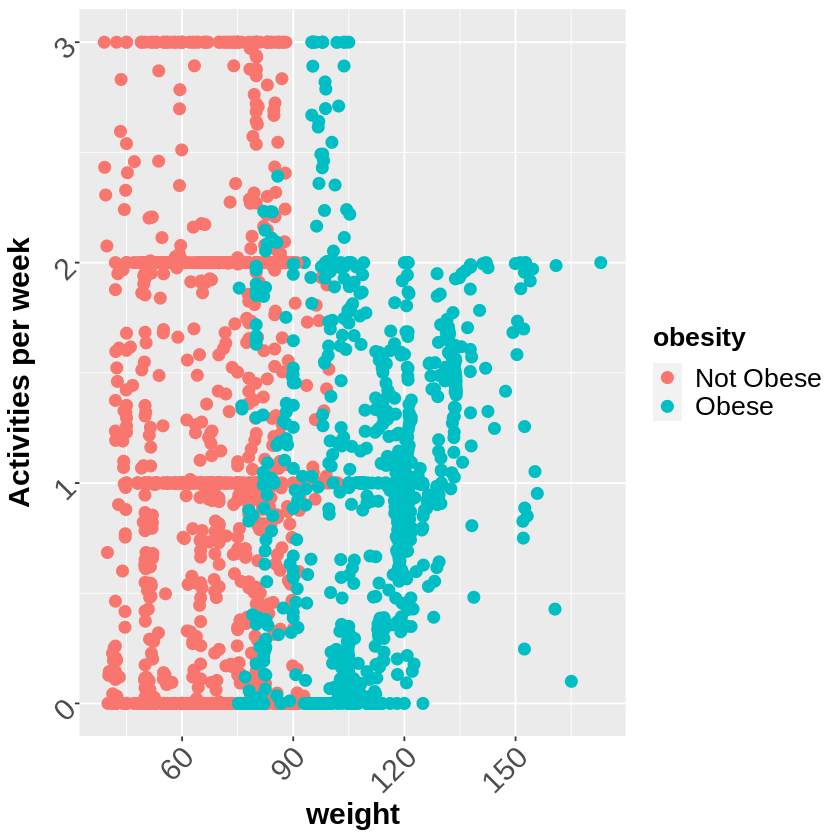

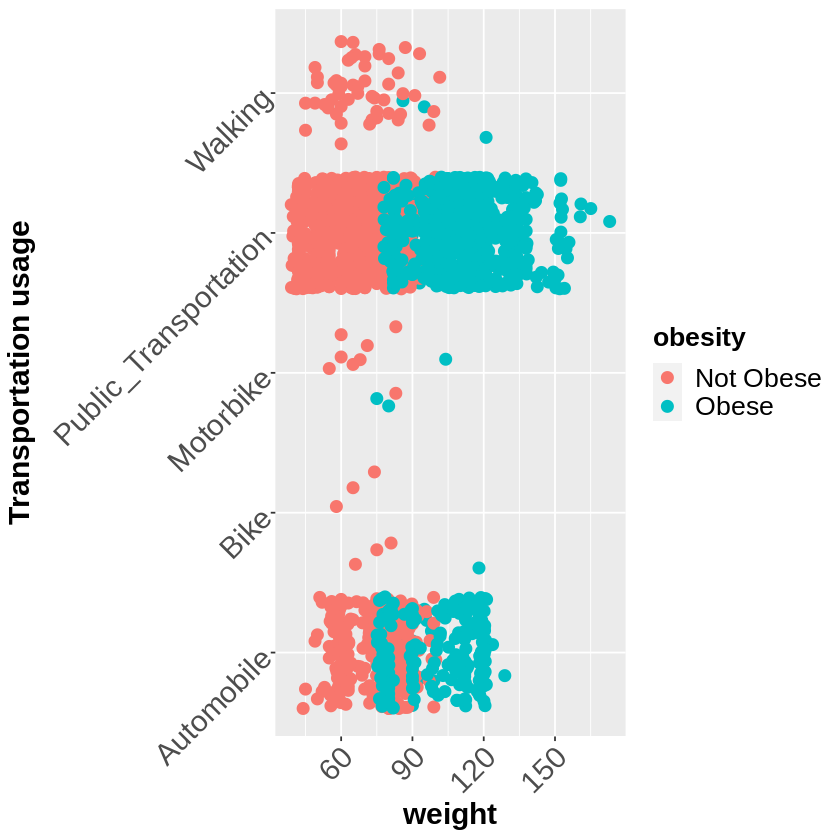

In [35]:
# Visualizing multivariate relationship with 3 variables keeping obesity and weight
# I used obesity and weight as common varibales in each plot since they clearly show high correlation

ggplot(data = df, aes(y=gender, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Gender")+ 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=age, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Age")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=height, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Height")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=fam_hist_obs, x = weight, color = obesity))+ geom_jitter(size=3) + 
ylab("Family history of obesity") + 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=high_cal_food_consume, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("High calorie food consume") + 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=meals_with_vegetables, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Meals with vegetables") + 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=meals_a_day, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("No of Meals a day")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=food_between_meals, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Food between meals")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=smoke, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Smoke")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=water_consumption, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Water consumption")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=time_tech_uses, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Time with tech devices")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=alcohol_intake, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Alcohol intake")+
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=monitor_calories, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Monitor calories") + 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=activities_perweek, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Activities per week") + 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

ggplot(data = df, aes(y=transportation_usage, x = weight, color= obesity))+ geom_jitter(size=3) + 
ylab("Transportation usage") + 
theme(axis.text=element_text(angle=45,vjust = 0.5, hjust=1,size=18),axis.title=element_text(size=18,face="bold")) +
theme(legend.text=element_text(size=16),legend.title=element_text(size=16,face="bold"))

Jitter plot with 3 variables suggests that 'Family history of obesity','High calorie food consume','Monitor calories',
'Activities per week' and 'Transportation usage' show visual differences in data distribution as per obesity and  respective variable levels.
Firstly, people with 'Family history of obesity' and 'High calorie food consume'as YES are almost always obese.
Secondly, people with 'Monitor calories' as NO are almost always obese.
Thirdly, people with less number of 'Activities per week' have more obesity incidences.
Lastly, people who used Walking as 'Transportation usage' have less number of obesity incidences.
These trivariate jitter plots are better in showing the differences in data distribution than biovariate jitter plots in black shown above.

Modifying/preparing dataset for correlation plot: To further find out correlation between the 17 variables. Here, I transformed some qualitative variables to quantitative variables as our dataset has mixed data.

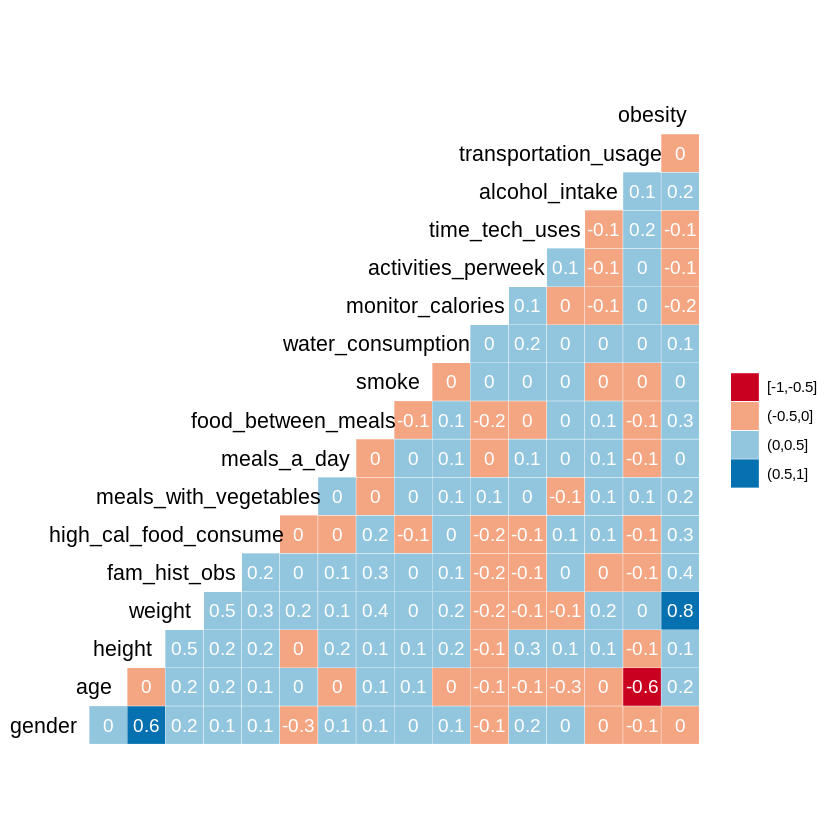

In [36]:
# Dataset modification to treat facor variabels as numeric for calculating correlaiton between variables
df1=df
df1$gender=as.numeric(df$gender)
df1$fam_hist_obs=as.numeric(df$fam_hist_obs)
df1$high_cal_food_consume=as.numeric(df$high_cal_food_consume)
df1$food_between_meals=as.numeric(df$food_between_meals)
df1$smoke=as.numeric(df$smoke)
df1$monitor_calories=as.numeric(df$monitor_calories)
df1$alcohol_intake=as.numeric(df$alcohol_intake)
df1$transportation_usage=as.numeric(df$transportation_usage)
df1$obesity=as.numeric(df$obesity)

# Plotting correlation between variables (all regarded as numeric)
ggcorr(df1, nbreaks = 4, hjust = 0.9, cex =4.5,palette = "RdBu",layout.exp = 1, label = TRUE, label_size =4, label_color = "white")

Correlation plot suggests that there is a strong positive correlation 0.8 between obesity and weight. Obesity also shows a low positive correlation 0.4 with 'Family history of obesity'.
Obesity also shows a low positive correlation 0.3 with 'High calorie food consume'. Transportation usage has a negative correlation -0.6 with Age.
Gender has a positive correlation 0.6 with Age. No further significant correlations were observed between variables.

## 3. Modelling and Hypothesis Testing:

##### Clearly, weight has strongest positive correlation with Obesity. However, do only higher weight lead to obesity ? Looking at other vaiables, someone with a family history of obesity may have higher chance of getting obese even with low weight or someone with no history and low weight may become obese due to high calorie food consumption. On the contrary, higher activity can reduce weight and hence chances of getting obese and those who mointor calories may have lowere chances of getting obese.


Clustering of variables from mixed data (distinuguishing between continuous and categorical variables)

[1] "gender"                "age"                   "height"               
 [4] "weight"                "fam_hist_obs"          "high_cal_food_consume"
 [7] "meals_with_vegetables" "meals_a_day"           "food_between_meals"   
[10] "smoke"                 "water_consumption"     "monitor_calories"     
[13] "activities_perweek"    "time_tech_uses"        "alcohol_intake"       
[16] "transportation_usage"  "obesity"

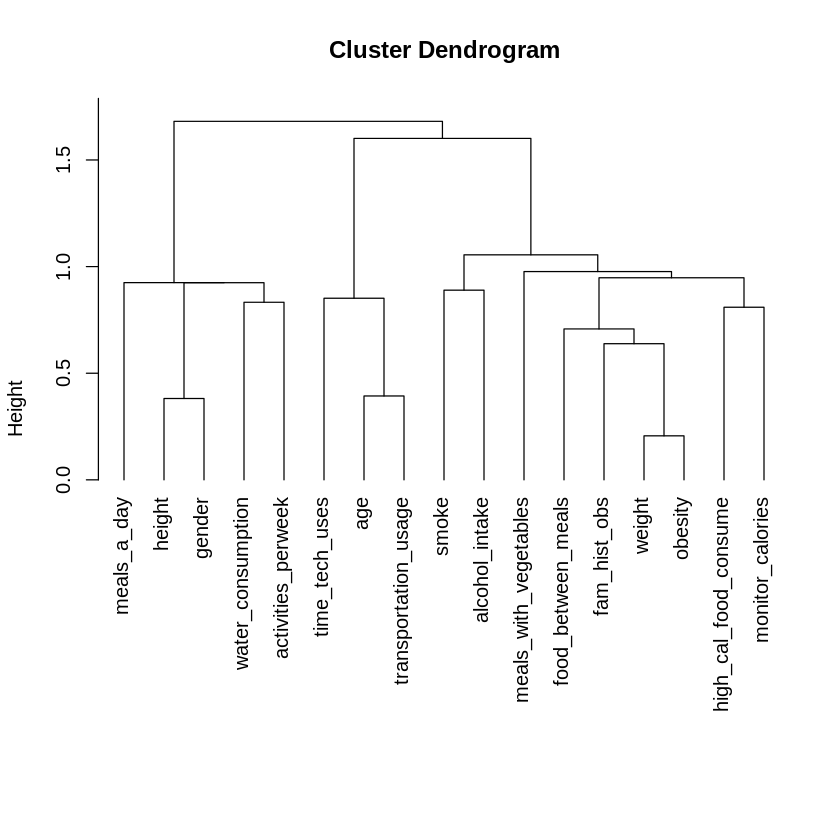

In [37]:
colnames(df)

# Dividing dataset into two datasets, one for continuous and another one for categorcial variables
xquant <- df[,c(2,3,4,7,8,11,13,14)] # Continuous variables
xqual <- df[,c(1,5,6,9,10,12,15,16,17)]  # Categorical variables

# Clustering both types of variables
tree <- hclustvar(xquant, xqual)

# Plotting cluster tree
plot(tree)

Clustering of variables suggests that 'Weight', 'Obesity', 'Family history of obesity' clustered together.'High calorie food consume' and 'Monitor calories' clustered together.
'Transportation usage' clustered with 'Age'.

Principal Component Analysis of mixed data (distinguishing between continuous and categorical variables)

[1] "gender"                "age"                   "height"               
 [4] "weight"                "fam_hist_obs"          "high_cal_food_consume"
 [7] "meals_with_vegetables" "meals_a_day"           "food_between_meals"   
[10] "smoke"                 "water_consumption"     "monitor_calories"     
[13] "activities_perweek"    "time_tech_uses"        "alcohol_intake"       
[16] "transportation_usage"  "obesity"

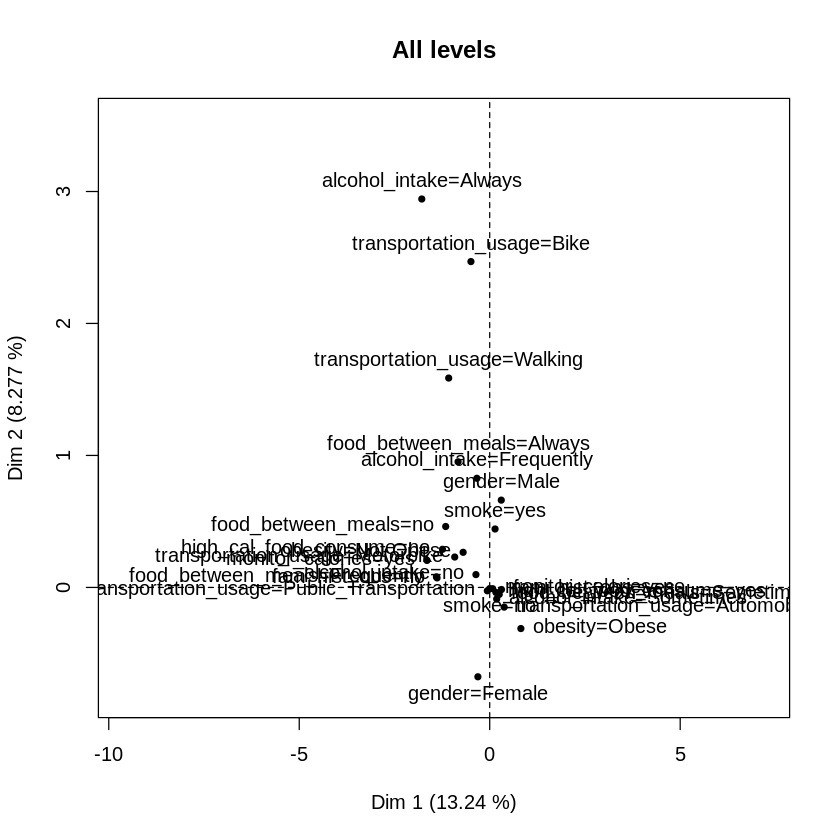

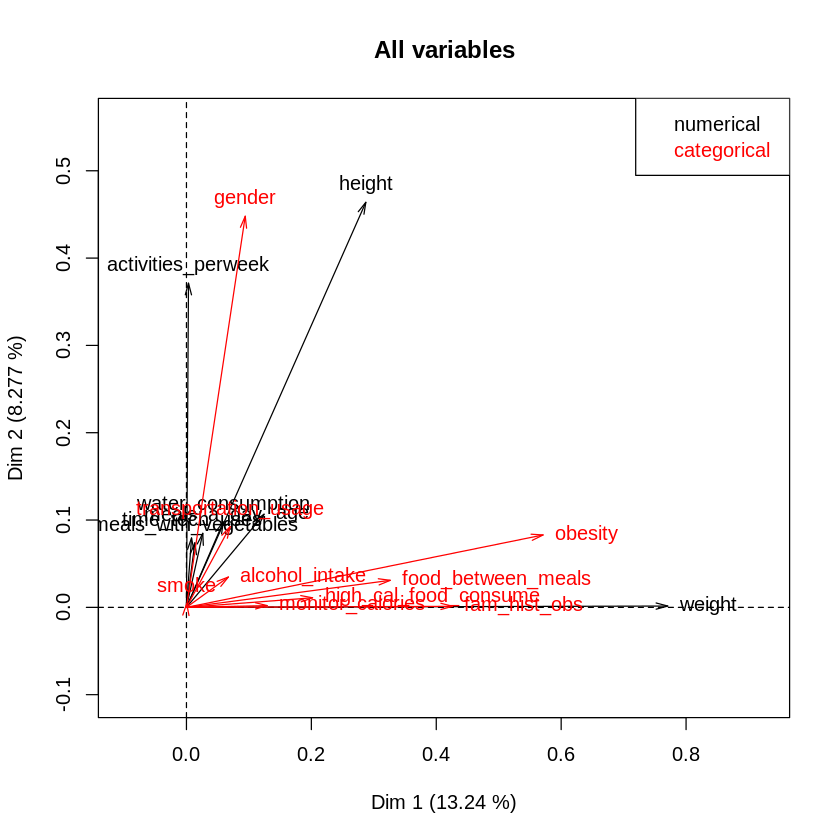

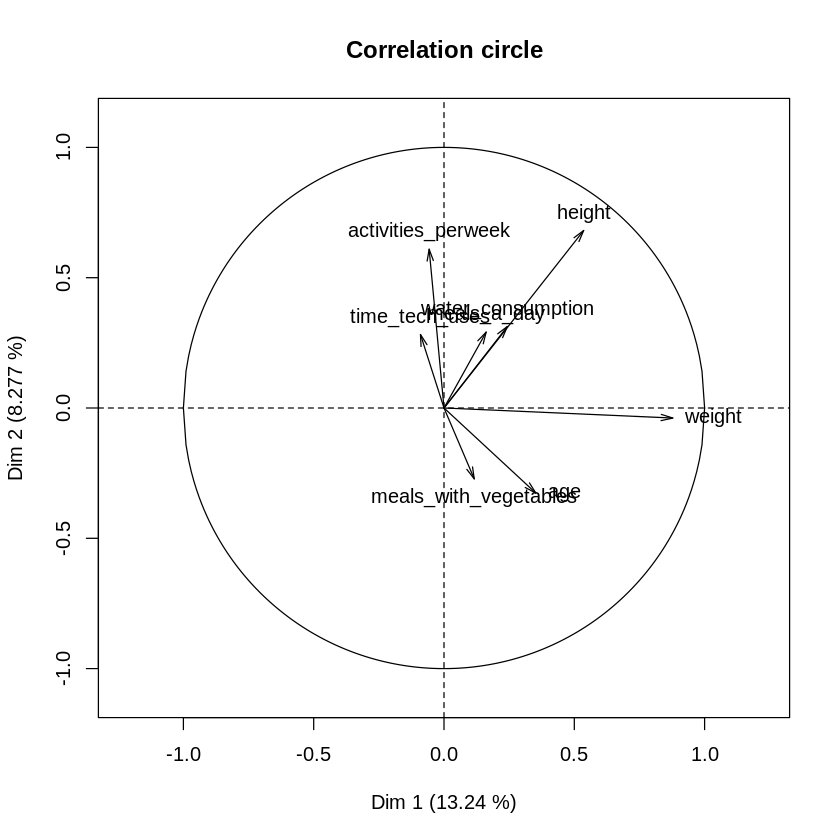

In [38]:
colnames(df)

# Dividing dataset into two datasets, one for continuous and another one for categorcial variables
xquant <- df[,c(2,3,4,7,8,11,13,14)] # Continuous variables
xqual <- df[,c(1,5,6,9,10,12,15,16,17)]  # Categorical variables

# PCA object generation for mixed data
res.pcamix <- PCAmix(X.quanti = xquant, X.quali = xqual, rename.level=TRUE, graph = F)

# Plotting PCA plots from the PCA object
plot(res.pcamix,choice="levels",xlim=c(-8,6), main="All levels")
plot(res.pcamix,choice="sqload",coloring.var=T, leg=TRUE,posleg="topright", main="All variables")
plot(res.pcamix, choice="cor",main="Correlation circle")

All plots suggest that the two principal compoenent directions explain very low percentage of variation in data "All variables" plot suggests that 'Obesity', 'Family history of obesity','High calorie food consume','Monitor calories',
'Food between meals' and 'Weight' may correlate with each other and influence Dimension 1 of PCA.
"All variables" plot also suggests that vectors of rest of the variables are at a higher angular difference (even approaching 90 degrees) suggesting no likely correlation and influence Dimension 2 of PCA.

This could be due to the large number of variables in the dataset. I intend to find those variables which can explain the classification into 'Not Obese' and 'Obsese' data.

I am repeating the PCA for mixed data with reduced dataset considering only variables: 'weight','fam_hist_obs','high_cal_food_consume','monitor_calories','activities_perweek' and 'obesity' 
based on PCA, correlation and jitter plots as shown above.

[1] "gender"                "age"                   "height"               
 [4] "weight"                "fam_hist_obs"          "high_cal_food_consume"
 [7] "meals_with_vegetables" "meals_a_day"           "food_between_meals"   
[10] "smoke"                 "water_consumption"     "monitor_calories"     
[13] "activities_perweek"    "time_tech_uses"        "alcohol_intake"       
[16] "transportation_usage"  "obesity"

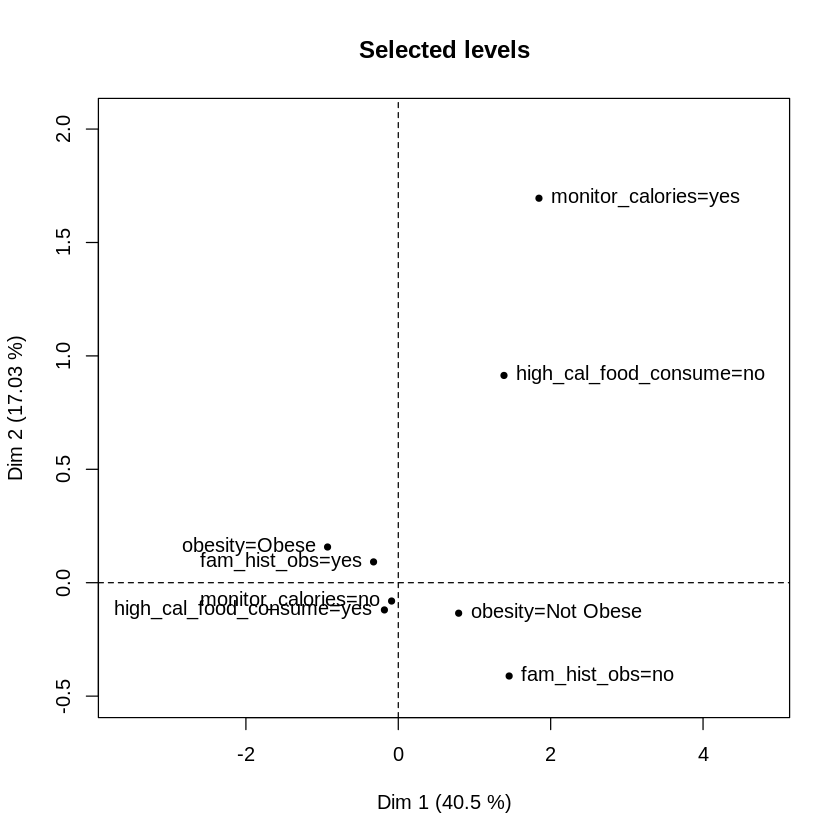

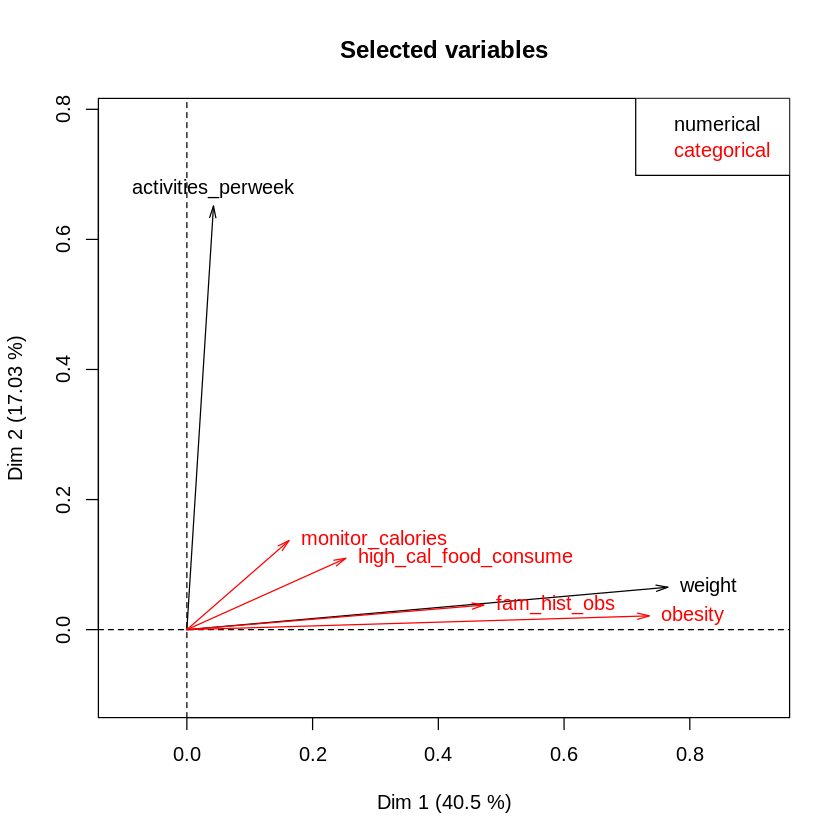

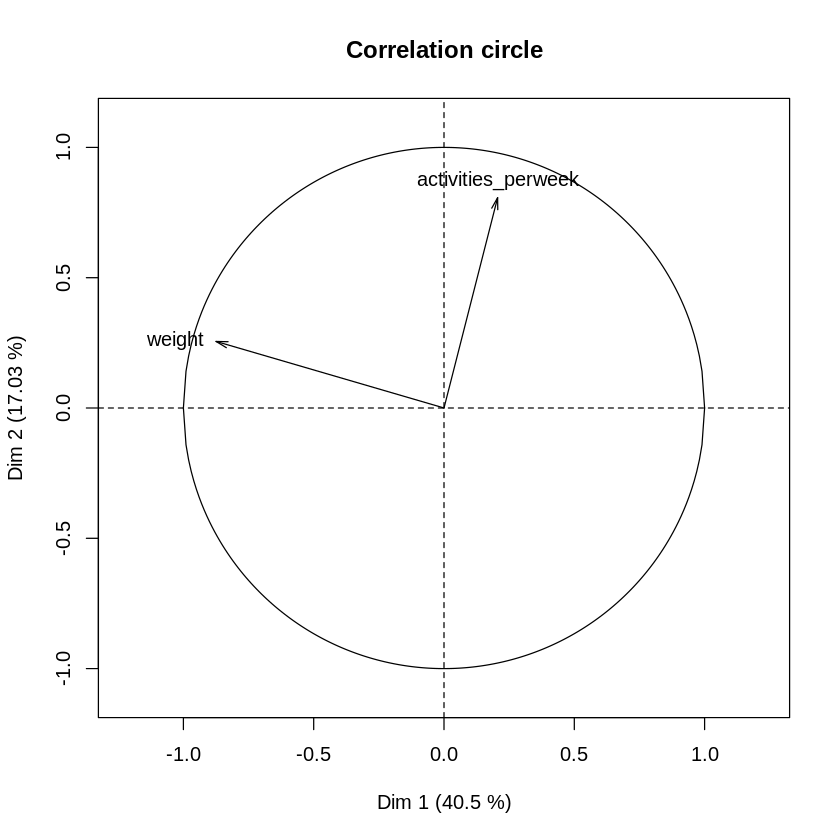

In [39]:
colnames(df)

# Dividing dataset into two datasets, one for continuous and another one for categorcial variables for reduced number of variables
xquant1 <- df[,c(4,13)] # Continuous variables
xqual1 <- df[,c(5,6,12,17)]  # Categorical variables

# PCA object generation for mixed data
res.pcamix1 <- PCAmix(X.quanti = xquant1, X.quali = xqual1, rename.level=TRUE, graph = F)

# Plotting PCA plots from the PCA object
plot(res.pcamix1,choice="levels",xlim=c(-3,4), main="Selected levels")
plot(res.pcamix1,choice="sqload",coloring.var=T, leg=TRUE,posleg="topright", main="Selected variables")
plot(res.pcamix1, choice="cor",main="Correlation circle")

Plots with reduced number of variables suggest that the first dimension of principal component can explain 40% . The second dimension of principal components can explain 17%. I intend to find those variables which can explain the classification into 'Not Obese' and 'Obsese' data. "All variables" plot suggests that 'Obesity', 'Family history of obesity','High calorie food consume','Monitor calories', and 'Weight' may correlate positively with each other and these vectors influence dimension 1 of PCA.

I am running logistic regression which is suitable for the predictive modelling of obesity since we have mixed data

In [40]:
library(caTools)
set.seed(1000)

# I used 66% of dataset as training set and 34% as test set...
split = sample.split(df$obesity, SplitRatio = 0.66)
train = subset(df, split == TRUE)
test  = subset(df, split == FALSE)
nrow(train);nrow(test)

# running GLM model on training dataset with all variables...
model1<- glm(obesity ~.,family=binomial(link='logit'), maxit=100 ,data=df)
summary(model1)

[1] 1394

[1] 717

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = obesity ~ ., family = binomial(link = "logit"), 
    data = df, maxit = 100)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.523e-05  -2.100e-08  -2.100e-08   2.100e-08   9.572e-06  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                2.888e+03  6.724e+07   0.000
genderMale                                -7.258e+01  1.944e+05   0.000
age                                        1.753e+00  1.443e+04   0.000
height                                    -2.907e+03  3.101e+06  -0.001
weight                                     3.342e+01  3.272e+04   0.001
fam_hist_obsyes                           -5.577e+01  1.055e+06   0.000
high_cal_food_consumeyes                  -7.500e-01  1.388e+05   0.000
meals_with_vegetables                     -2.389e+00  1.460e+05   0.000
meals_a_day                               -1.377e+00  9.904e+04   0.000
food_between_mealsFrequ

Model1 has an AIC of 48 but all p-values associated with the variables are very high approaching 1. Hence, this model cannot be used and we may need to reduce the number of variables based on above analyses.

'Weight, 'Family history of obesity','High calorie food consume' may predict 'Obesity'. My hypothesis is that higher weight will lead to increased obesity but even people with low weight may have higher chance of getting obese if there is already someone obese in the family and high calorie food is consumed. I am running Model2 which is a model retaining variables 'weight','fam_hist_obs','high_cal_food_consume','monitor_calories', 'activities_perweek','transportation_usage' to explain obesity classification.

In [41]:
# running second GLM model on training dataset with reduced number of variables...
model2 <- glm(obesity ~ weight + fam_hist_obs + high_cal_food_consume + monitor_calories +
              activities_perweek + transportation_usage,family=binomial(link='logit'),maxit=100,
              data=train[,c(4,5,6,12,13,16,17)])
summary(model2)


# Running the anova() function on Model2 to see the deviance of the regression model...
anova(model2, test="Chisq")


Call:
glm(formula = obesity ~ weight + fam_hist_obs + high_cal_food_consume + 
    monitor_calories + activities_perweek + transportation_usage, 
    family = binomial(link = "logit"), data = train[, c(4, 5, 
        6, 12, 13, 16, 17)], maxit = 100)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.29244  -0.19773  -0.01188   0.13812   2.19130  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -17.9648     1.2804 -14.031  < 2e-16
weight                                      0.1781     0.0118  15.091  < 2e-16
fam_hist_obsyes                             1.9025     0.7138   2.665  0.00769
high_cal_food_consumeyes                    1.0928     0.5463   2.000  0.04546
monitor_caloriesyes                        -0.4640     0.9439  -0.492  0.62304
activities_perweek                         -0.4083     0.1268  -3.221  0.00128
transportation_usageBike                   -9.4463   493

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)     
NULL                  NA           NA 1393      1923.8053             NA
weight                 1 1324.4022859 1392       599.4030  5.627306e-290
fam_hist_obs           1   13.1832227 1391       586.2197   2.824666e-04
high_cal_food_consume  1    5.9050412 1390       580.3147   1.509761e-02
monitor_calories       1    0.3470462 1389       579.9677   5.557900e-01
activities_perweek     1   12.7941072 1388       567.1735   3.477129e-04
transportation_usage   4    4.7676778 1384       562.4059   3.119763e-01

Model2 has an AIC of 582.41
p-values associated with variables 'Weight','Family history of obesity' and 'Activities per week' are less than 0.01.
Based on Z-values, first two variables have positive correlation while third one has a negative correlation with obesity.

'Monitor calories' and 'Transportation usage' have p-values higher than 0.05 in ANOVA of Model2. I intend to run another model with these variables removed from Model2.

I am running Model3 after removing 'high_cal_food_consume' and 'monitor_calories' from Model2

In [42]:
# running third GLM model on training dataset with even less number of variables...
model3 <- glm(obesity ~ weight + fam_hist_obs + activities_perweek,family=binomial(link='logit'), 
              maxit=100,data=train[,c(4,5,13,17)])
summary(model3)

#run the anova() function on the model to see the deviance of the regression model...
anova(model3, test="Chisq")


Call:
glm(formula = obesity ~ weight + fam_hist_obs + activities_perweek, 
    family = binomial(link = "logit"), data = train[, c(4, 5, 
        13, 17)], maxit = 100)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.30049  -0.23029  -0.01258   0.13370   2.28210  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -17.26230    1.19844 -14.404  < 2e-16 ***
weight               0.17983    0.01159  15.513  < 2e-16 ***
fam_hist_obsyes      2.02608    0.73981   2.739 0.006169 ** 
activities_perweek  -0.45219    0.12385  -3.651 0.000261 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1923.81  on 1393  degrees of freedom
Residual deviance:  572.21  on 1390  degrees of freedom
AIC: 580.21

Number of Fisher Scoring iterations: 8


Df Deviance   Resid. Df Resid. Dev Pr(>Chi)     
NULL               NA         NA 1393      1923.8053             NA
weight              1 1324.40229 1392       599.4030  5.627306e-290
fam_hist_obs        1   13.18322 1391       586.2197   2.824666e-04
activities_perweek  1   14.00867 1390       572.2111   1.819697e-04

This model has an AIC of 580.21.
The p-values are all less than 0.01 signficance level.
Z-values suggest that Weight and Family history of obesity can affect obesity positively.
So, More Activities per week can reduce obesity.

 Finally, I have compared Model2 and Model3

In [43]:
anova(model2,model3,test = "Chisq")

Resid. Df Resid. Dev Df Deviance  Pr(>Chi) 
1 1384      562.4059   NA        NA        NA
2 1390      572.2111   -6 -9.805203 0.1330987

Based on the p-value greater than 0.05, both Models are equally good. I will proceed with Model3.

 Similar to linear regression, I have tried to find the R-squared for logistic regression

In [44]:
pR2(model3)

fitting null model for pseudo-r2


llh      llhNull           G2     McFadden         r2ML         r2CU 
-286.1055367 -961.9026257 1351.5941780    0.7025629    0.6207576    0.8294055

McFadden R2 is around 0.7 suggesting that Model3 is a good model fit for obesity classification.

I have developed Model3 based on training datset and I intend to run it on the test dataset.

In [45]:
# running Model3 on testing dataset
probs1 = predict(model3, type = "response", newdata=test)
preds1 = ifelse(probs1 > 0.5,1,0)

I am using prediction of probabilities: greater than 0.5 to be "Obese" and less than 0.5 to be "Not Obese", a binary classification.

I have verified the accuracy, sensitivty , specifictiy and precision of the MODEL3 in predicting person as "Obese" Prepared the contingency table based on test dataset

In [46]:
# evaluating goodness of fit for model obtained from training dataset on test dataset
table(test$obesity,preds1>0.5)

print(paste('Accuracy =', (361+278)/(361+278+52+26)))
print(paste('Sensitivity =', 278/(278+52)))
print(paste('Specificity =', 361/(361+26)))
print(paste('Precision =', (278)/(278+26)))

           
            FALSE TRUE
  Not Obese   361   26
  Obese        52  278

[1] "Accuracy = 0.891213389121339"
[1] "Sensitivity = 0.842424242424242"
[1] "Specificity = 0.9328165374677"
[1] "Precision = 0.914473684210526"


All the parameters have very high values between 0.85-0.93 suggesting the Model3 is excellent choice in Obese prediction.

I prepared an ROC curve for Model3 to show the performance of this classification model at all classification thresholds.

[1] 0.9689883

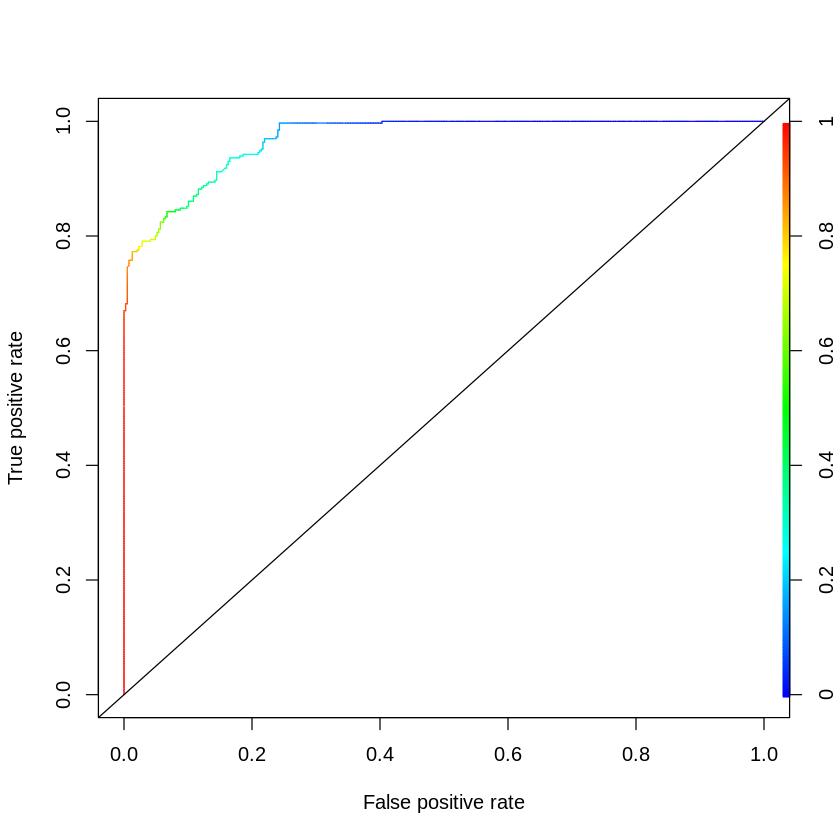

In [47]:
#Running ROCR on test dataset
ROCR_predictions = prediction(probs1, test$obesity)

#calculating the preformance metric for classification Model3
perf = performance(ROCR_predictions,"tpr","fpr")

#I plotted the ROC curve to show the behavior of Model3 while predicting obesity classification into 'Obese' and 'Not Obese'
plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)

The performance metric of Model3 is around 0.97 which is quite good.

Based on the multiple analyses above, I intend to verify if the 3 variables 'weight', 'fam_hist_obs' and 'activities_perweek' 
shows significant differences based on obesity levels. I am going to use statistical t-test or wilcoxon test or chi-squre/fishers exact test for interpreting significant differences in 'weight', 'fam_hist_obs' and 'activities_perweek' based on 'obesity' classification levels.

###### First statistical test: weight vs obesity. 
* Null hypothesis: Mean weight of "Obese" and "Not obese" people are not statistically different.
* Alternate hypothesis: Mean weight of "Obese" and "Not obese" people are significantly different.

gender age height weight fam_hist_obs high_cal_food_consume
1 Male   18  1.87   173    yes          yes                  
  meals_with_vegetables meals_a_day food_between_meals smoke water_consumption
1 3                     3           Frequently         no    2                
  monitor_calories activities_perweek time_tech_uses alcohol_intake
1 no               2                  1              Sometimes     
  transportation_usage  obesity is.outlier is.extreme
1 Public_Transportation Obese   TRUE       FALSE

Df   F value  Pr(>F)    
group    1 6.962028 0.00838701
      2109       NA         NA


	Fligner-Killeen test of homogeneity of variances

data:  weight by obesity
Fligner-Killeen:med chi-squared = 12.196, df = 1, p-value = 0.000479


variable statistic p           
1 weight   0.9765006 3.770147e-18

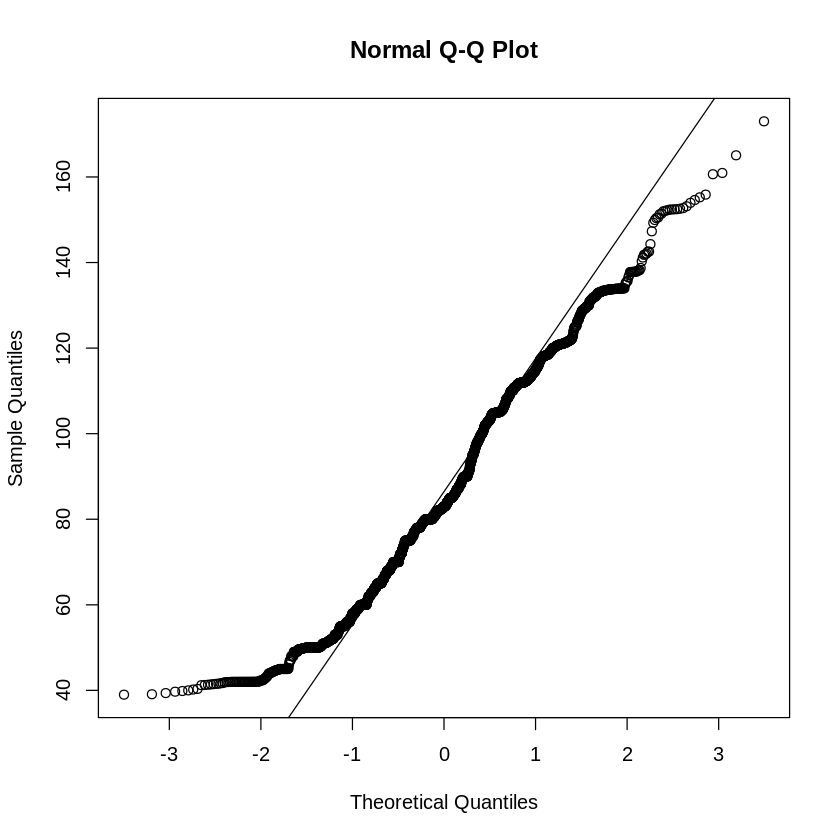

In [48]:
# Verifying outlier detection
df %>% identify_outliers(weight)

# Check variance equality and normality assumption between Weight data for "Not Obese" and "Obese" datasets
# variance test...
leveneTest(weight ~ obesity, data = df)
fligner.test(weight ~ obesity, data = df)

#normality assumption test...
df %>% shapiro_test(weight)

#another normality assumption test...
qqnorm(df$weight)
qqline(df$weight)

There is one outlier in weight dataset. Variance equality cannot be assumed since the p-values from levene test and Fligner-Killeen test are less than 0.01.
Normality assumption is not met since the  p-values fromshapiro test are less than 0.01;however the curve looks quite okay.

obesity   num.obs mean.weight sd.weight se.weight
1 Not Obese 1139     67         15        0        
2 Obese      972    109         17        1


	Wilcoxon rank sum test with continuity correction

data:  weight by obesity
W = 36878, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -42.87460 -39.98021
sample estimates:
difference in location 
             -41.27785 


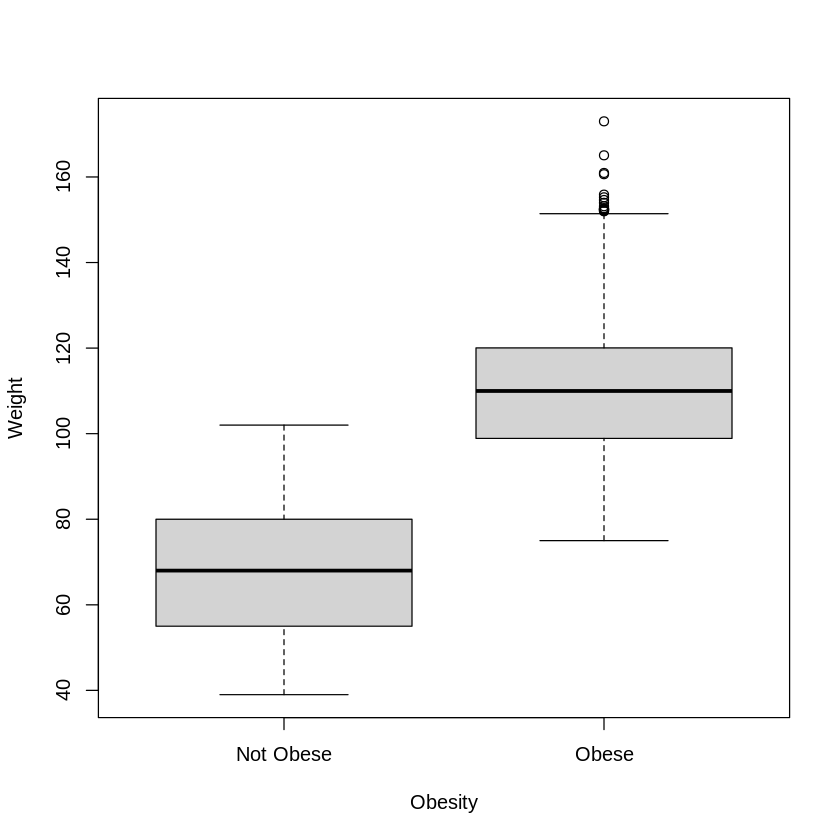

In [49]:
# First statistical test: weight vs obesity (Con.)
# Descriptive data for weight based on obesity classification
df %>%
  group_by(obesity) %>%
  summarize(num.obs = n(),
            mean.weight = round(mean(weight), 0),
            sd.weight = round(sd(weight), 0),
            se.weight = round(sd(weight) / sqrt(num.obs), 0))

# Since the variance equality and normality assumption test failed
# I used wilcoxon test to check significant differences in weight
wilcox.test(weight ~ obesity, data = df, conf.int=TRUE)

# visualize the weight differences between "Not Obese" and "Obese" people
plot(weight ~ obesity, data = df,xlab="Obesity",ylab="Weight")

Wilcoxon test p-value is less than 0.01; so null hypothesis can be rejected. Suggesting significant differences between weights of Obese and Not obese people.
More weight can lead to increased BMI and hence obesity.

###### Second statistical test: activities per week and obesity. 
* Null hypothesis: Mean activities per week of "Obese" and "Not obese" people are not statistically different.
* Alternate hypothesis: Mean activities per week of "Obese" and "Not obese" people are significantly different.

gender age height weight fam_hist_obs high_cal_food_consume
     meals_with_vegetables meals_a_day food_between_meals smoke
     water_consumption monitor_calories activities_perweek time_tech_uses
     alcohol_intake transportation_usage obesity is.outlier is.extreme

Df   F value  Pr(>F)     
group    1 10.35432 0.001311307
      2109       NA          NA


	Fligner-Killeen test of homogeneity of variances

data:  activities_perweek by obesity
Fligner-Killeen:med chi-squared = 35.083, df = 1, p-value = 3.16e-09


variable           statistic p           
1 activities_perweek 0.9151813 7.714519e-33

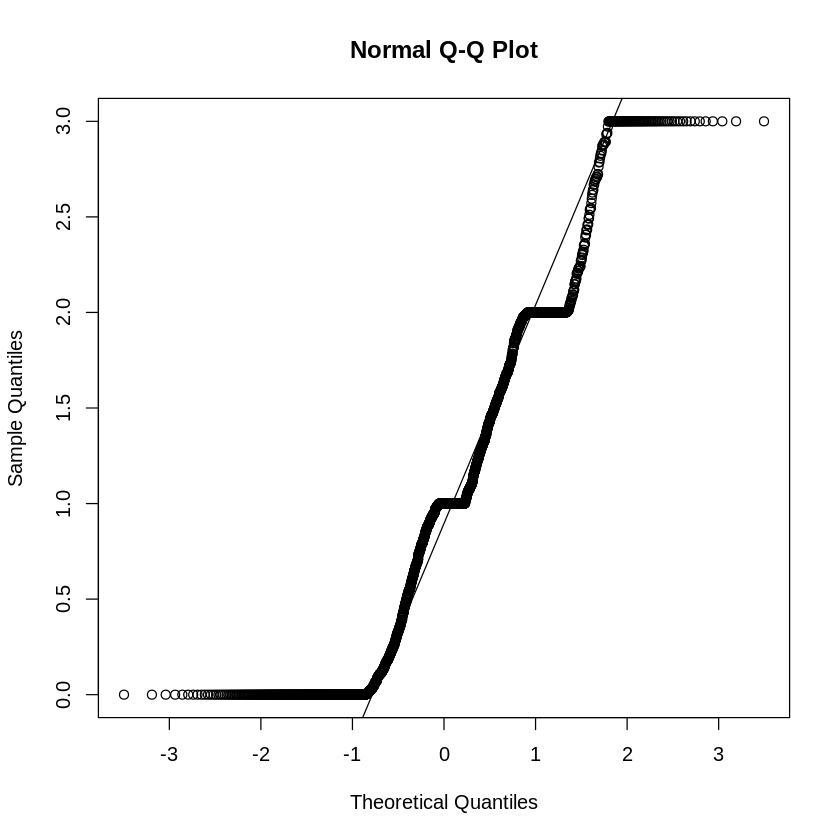

In [50]:
# Verifying outlier detection
df %>% identify_outliers(activities_perweek)

# Check variance and normality assumption between Weight data for "Not Obese" and "Obese" datasets
# variance test...
leveneTest(activities_perweek ~ obesity, data = df)
fligner.test(activities_perweek ~ obesity, data = df)

#normality assumption test...
df %>% shapiro_test(activities_perweek)

#another normality assumption test...
qqnorm(df$activities_perweek)
qqline(df$activities_perweek)

There is no outlier in 'Activities per week' dataset. Variance equality cannot be assumed since the p-values from levene test and Fligner-Killeen test are less than 0.01. Normality assumption is not met since the  p-values from shapiro test are less than 0.01 and the curve deviates from line.

obesity   num.obs mean.activities_perweek sd.activities_perweek
1 Not Obese 1139    1                       1                    
2 Obese      972    1                       1                    
  se.activities_perweek
1 0                    
2 0


	Wilcoxon rank sum test with continuity correction

data:  activities_perweek by obesity
W = 634584, p-value = 5.463e-09
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 0.06755013 0.25694643
sample estimates:
difference in location 
             0.1468174 


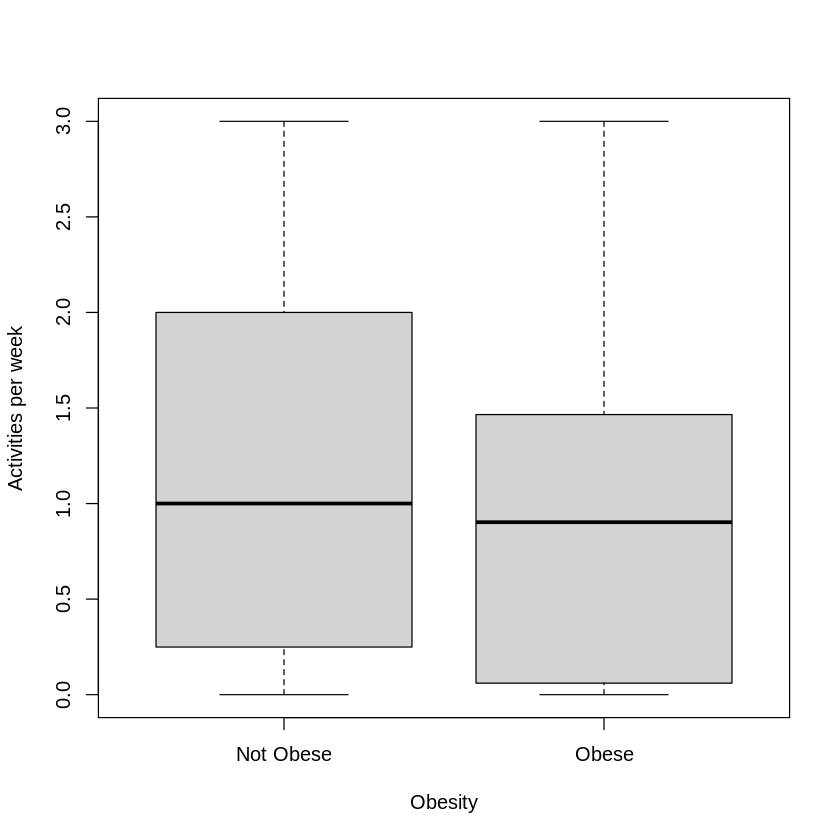

In [51]:
# Second statistical test: activities per week and obesity (Con.)
# Descriptive data for 'Activities per week' based on obesity classification
df %>%
  group_by(obesity) %>%
  summarize(num.obs = n(),
            mean.activities_perweek = round(mean(activities_perweek), 0),
            sd.activities_perweek = round(sd(activities_perweek), 0),
            se.activities_perweek = round(sd(activities_perweek) / sqrt(num.obs), 0))

# Since the variance equality and normality assumption test failed
# I used wilcoxon test to check significant differences in 'Activities per week'
wilcox.test(activities_perweek ~ obesity, data = df, conf.int=TRUE)

# visualize the 'Activities per week' differences between "Not Obese" and "Obese" people
plot(activities_perweek ~ obesity, data = df,xlab="Obesity",ylab="Activities per week")

Wilcoxon test p-value is less than 0.01; so null hypothesis can be rejected. Suggesting significant differences between 'Activities per week'of Obese and Not obese people.
More activity can lead to lower weight and hence less chances of obesity.

###### Third statistical test: 'Family history of obesity' vs obesity
* Null hypothesis: The ratio of people with 'Family history of obesity' to those who do not is not different for both obesity classification levels.
* Alternate hypothesis:The ratio of people with 'Family history of obesity' to those who do not is different for both obesity classification levels.

            obesity
fam_hist_obs Not Obese Obese
         no        377     8
         yes       762   964


	Fisher's Exact Test for Count Data

data:  tbl
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  29.62597 140.17563
sample estimates:
odds ratio 
  59.61522 



	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 364.23, df = 1, p-value < 2.2e-16


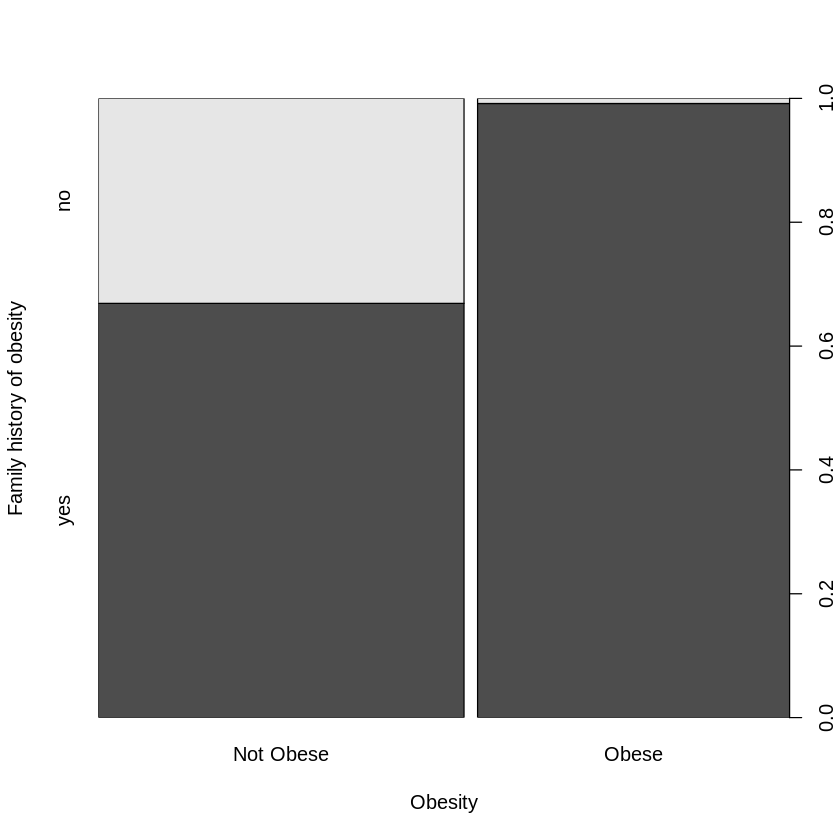

In [52]:
# Third statistical test: 'Family history of obesity' vs obesity...Two categorical variables
tbl = with(df, table(fam_hist_obs,obesity))
tbl

# The null hypothesis is that no relationship exists on the 'Family history of obesity' in the population
# based on obesity classification levels

#Fischer's exact test: obesity vs fam_hist_obs...
fisher.test(tbl)

#Chi-Square test: obesity vs fam_hist_obs...
chisq.test(tbl)

# visualize the 'Family history of obesity' proportion differences between "Not Obese" and "Obese" people
plot(fam_hist_obs ~ obesity, data = df, xlab="Obesity",ylab="Family history of obesity")

Both Fisher's exact and Chi-square test p-values are less than 0.01 significnace level. Null hypothesis can be reqjected. Suggesting significant differences in the proportion of 'Family history of obesity' with Yes and No 
in Obese and Not obese people. For example, the ratio people with a family history of obesity to those without it is 762/377 = 2 for non-obese people.
The ratio of people with family history of obesity to those without it is 964/8 = 120.5 for obese people.
Thus the ratios in Non-obese is 2 but in Obese is 120.5 suggesting higher chances of people getting obesity if they have 
a family history of obesity.

## 4. Insights:

Source: https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
The data contained estimation of obesity levels in individuals from 3 countries (Mexico, Peru and Colombia),
based on living habits, genetics and physical condition.

The data contained 2111 sample instances and 17 measured traits for these 2111 samples. There are 17 variables with 9 variables being character and 8 variables being numeric. I renamed these measured traits, converted character vectors to factor and reduced classification levels of obesity to a binary one. 

In exploratory data analysis, I prepared histogram plots for all variables. In next step, to visualize the relation between these variables and obesity, I used jitter plots. Weight showed strongest data distribution differences based on obesity levels. Number of non-obese to obese people is not much different. On the contrary, the number of people who have family history of obesity, who consume high calorie foods, and who monitor calories is vastly different from those who do not.

Hence, I further plotted jitter plots with weight and obesity to see patterns in data distribution for remaining variables.
Since it is a mixed data, I used variable clustering to find closely clustered variables and performed PCA for mixed data to study the influence of the variables in the princicpal components. Both suggested that weight, family history of obesity,
high calorie consumption are positively related to obesity.

To find variables which can correctly predict obesity classification, I used logistic regression as I have mixed data
With data reduction, the final model contianed obesity prediction based on weight, family history of obesity,and Activites per week.The first two were in positive correlation while the third one showed negative correlation.

To test the impact of obesity levels on the signficant differences in the 3 variables, I conducted non-parametric 
Wilcoxon tests for Weight vs Obesity and Activity per week vs Obesity datsets while Chi-squre and fisher exact test for 
Family history of obesity vs Obesity datasets. All 3 variables showed significnat differences between obese and non-obese people.


## 5. Results:

A person has more chance of being classified as obese if the weight is very high, has lower activity per week or has high family history of obesity. Thus, physical condition, work practices and genetics play a role in predicting obesity.

- Multivariate plot visualization gave early rends of obesity relation with weight, family history of obesity, high calorie food consume and monitor calories.
- Correlation plot gave a strong correlation between obesity and weight and low correlation of obesity with family history of obesity and high calorie food consume.
- PCA pointed towards the psotive correlation among obesity, family history of obesity, high calorie food consume, monitor calories.
- Logistic regression model allowed us to pinpoint weight, family history of obesity and activities per week as predictor variables for obesity level classification. The first two were positivel correlated while third one is negaitvely correlated.
- Mean weights of obese and non-obese people are statistically significantly different. 
- Mean activities per week of non-obese people is significantly greater than obese people.
- Ratio of people with a family history of obesity to those who do not is significantly higher in obese than non-obese people.

<img src="../images/Results1.jpg">









Overall, higher weight led to increased propensity towards being classified as obese.
People with more family history of obesity are more prone to getting obese and being classified as one.
People doing more activities per week have less chances of being classified as obese.